# Regressions with Factors

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ---- Loading in the data -----
df_train = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_training_data_add.xlsx')
df_val = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_validation_data_add.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_test_data_add.xlsx')


trading_day  IWSS_Equal  IWSS_Ratio  IWSS_Impurity   IWSS_perm   IWSS_SHAP  \
0  2022-01-03  172.834665  248.101765     193.552471  183.690008  191.411167   
1  2022-01-04  478.950784  799.860947     575.092369  528.750556  553.653187   
2  2022-01-05  -77.323765 -117.098227     -90.034397  -83.853929  -86.124607   
3  2022-01-06 -342.626214 -666.061737    -442.495367 -394.155886 -416.204100   
4  2022-01-07 -166.268091 -197.601107    -180.145611 -173.152745 -170.973743   
5  2022-01-10 -167.449695 -252.802607    -194.787185 -181.490600 -186.300198   
6  2022-01-11 -308.202573 -558.821171    -385.441363 -348.065210 -365.299727   
7  2022-01-12   99.489263  111.297715     101.790374  100.764828  102.950795   
8  2022-01-13 -219.014459 -450.619652    -289.603536 -255.497134 -272.235170   
9  2022-01-14   98.387802  194.925884     127.397246  113.408299  120.809748   

   IWSS_metric   IWSS_PCA  Sentiment_score       Date        Close  \
0     0.019391   4.495752         0.120967 2022-01-03  4796.560059   
1    -0.025514  15.291032         0.241375 2022-01-04  4793.540039   
2    -0.092959  -0.966468        -0.147671 2022-01-05  4700.580078   
3     0.014154  -6.923462        -0.023534 2022-01-06  4696.049805   
4     0.018934  -3.782034         0.093704 2022-01-07  4677.029785   
5    -0.016572  -7.073186        -0.207457 2022-01-10  4670.290039   
6    -0.074948  -6.943484        -0.092409 2022-01-11  4713.069824   
7     0.038107   6.872600         0.291715 2022-01-12  4726.350098   
8     0.086773  -2.972173         0.074232 2022-01-13  4659.029785   
9    -0.079982  -0.190863        -0.183516 2022-01-14  4662.850098   

          High          Low         Open      Volume        VIX  return_t  \
0  4796.640137  4758.169922  4778.140137  3831020000  16.600000       NaN   
1  4818.620117  4774.270020  4804.509766  4683170000  16.910000 -0.000630   
2  4797.700195  4699.439941  4787.990234  4887960000  19.730000 -0.019393   
3  4725.009766  4671.259766  4693.390137  4295280000  19.610001 -0.000964   
4  4707.950195  4662.740234  4697.660156  4181510000  18.760000 -0.004050   
5  4673.020020  4582.240234  4655.339844  4511810000  19.400000 -0.001441   
6  4714.129883  4638.270020  4669.140137  4101590000  18.410000  0.009160   
7  4748.830078  4706.709961  4728.589844  4048220000  17.620001  0.002818   
8  4744.129883  4650.290039  4733.560059  4251730000  20.309999 -0.014244   
9  4665.129883  4614.750000  4637.990234  4338490000  19.190001  0.000820   

   return_t+1  
0   -0.000630  
1   -0.019393  
2   -0.000964  
3   -0.004050  
4   -0.001441  
5    0.009160  
6    0.002818  
7   -0.014244  
8    0.000820  
9   -0.018388

In [3]:
# ---- Checking missing values ----
missing_values = df_train.isna().sum()
missing_values


trading_day        0
IWSS_Equal         0
IWSS_Ratio         0
IWSS_Impurity      0
IWSS_perm          0
IWSS_SHAP          0
IWSS_metric        0
IWSS_PCA           0
Sentiment_score    0
Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
VIX                0
return_t           1
return_t+1         0
dtype: int64

In [4]:
df_train = df_train.dropna(subset=['return_t'])
df_train.isna().sum()

trading_day        0
IWSS_Equal         0
IWSS_Ratio         0
IWSS_Impurity      0
IWSS_perm          0
IWSS_SHAP          0
IWSS_metric        0
IWSS_PCA           0
Sentiment_score    0
Date               0
Close              0
High               0
Low                0
Open               0
Volume             0
VIX                0
return_t           0
return_t+1         0
dtype: int64

# Short exploration

In [5]:
df_train.describe()

trading_day   IWSS_Equal   IWSS_Ratio  IWSS_Impurity  \
count                            459   459.000000   459.000000     459.000000   
mean   2022-12-02 16:03:08.235293952    48.418719    92.644665      62.374684   
min              2022-01-04 00:00:00 -1824.465430 -3511.819090   -2345.858340   
25%              2022-06-19 00:00:00  -111.829059  -170.794920    -129.190421   
50%              2022-12-01 00:00:00    15.697252    27.489732      21.620823   
75%              2023-05-17 12:00:00   136.697578   242.529012     171.256231   
max              2023-10-31 00:00:00  4781.351210  8028.486252    5795.830075   
std                              NaN   527.253867   894.686828     639.663075   

         IWSS_perm    IWSS_SHAP  IWSS_metric    IWSS_PCA  Sentiment_score  \
count   459.000000   459.000000   459.000000  459.000000       459.000000   
mean     55.599916    58.306677     0.016177    0.383267         0.002906   
min   -2093.464664 -2208.100976    -1.985019  -52.155467        -0.439101   
25%    -121.096719  -124.257733    -0.054641   -3.575636        -0.086561   
50%      19.253044    20.195823     0.010510    0.332494         0.005119   
75%     153.915062   162.947756     0.083682    3.834869         0.092240   
max    5304.016790  5513.212455     1.020686   94.866833         0.823778   
std     585.001464   609.755361     0.251313   11.792375         0.143990   

                                Date        Close         High          Low  \
count                            459   459.000000   459.000000   459.000000   
mean   2022-12-02 16:03:08.235293952  4155.774819  4185.356229  4124.416660   
min              2022-01-04 00:00:00  3577.030029  3608.340088  3491.580078   
25%              2022-06-19 00:00:00  3958.209961  3980.884888  3927.114990   
50%              2022-12-01 00:00:00  4137.040039  4159.770020  4109.180176   
75%              2023-05-17 12:00:00  4379.334961  4408.929932  4347.435059   
max              2023-10-31 00:00:00  4793.540039  4818.620117  4774.270020   
std                              NaN   260.679484   257.837914   263.902238   

              Open        Volume         VIX    return_t  return_t+1  
count   459.000000  4.590000e+02  459.000000  459.000000  459.000000  
mean   4156.263611  4.348907e+09   21.966275   -0.000213   -0.000189  
min    3520.370117  1.706460e+09   12.820000   -0.043237   -0.043237  
25%    3958.530029  3.827445e+09   17.875000   -0.007438   -0.007438  
50%    4133.109863  4.155320e+09   21.370001   -0.000712   -0.000712  
75%    4380.144775  4.686085e+09   25.865001    0.007350    0.007467  
max    4804.509766  9.354280e+09   36.450001    0.055434    0.055434  
std     262.097786  8.708444e+08    5.463473    0.012630    0.012639

The target variable (return_t+1) is a continuous value centered near zero, with a standard deviation of approximately 0.0126, indicating relatively small daily fluctuations, consistent with typical equity market behavior.

IWSS variables exhibit large ranges and high standard deviations, indicating substantial variation across the sample and suggesting they may capture complex market patterns or nonlinear effects.

Market-related features such as Close, Open, High, Low, Volume, and VIX offer direct numerical indicators of market conditions. These could be critical predictors, especially when normalized or differenced (e.g., using returns or log changes). Sentiment_score offers additional qualitative insight, albeit with low variance, possibly acting as a secondary or interaction feature. return_t, the current day’s return, may be useful for capturing short-term momentum or mean reversion effects.

Temporal fields like Date and trading_day could be used to extract additional time-based features (e.g., day of week, month, or holiday effects). All columns appear complete (no missing values), which simplifies preprocessing.




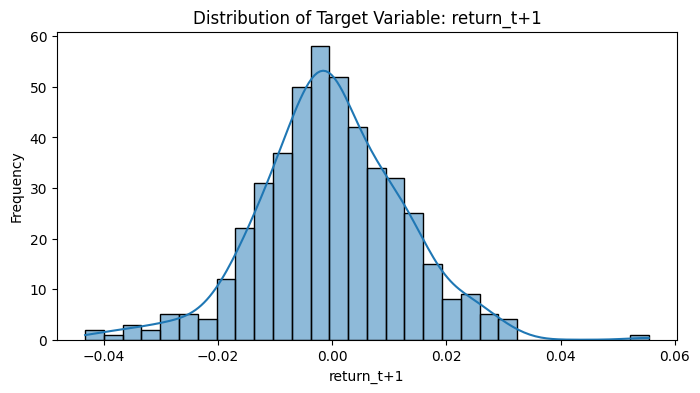

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(df_train['return_t+1'], kde=True, bins=30)
plt.title('Distribution of Target Variable: return_t+1')
plt.xlabel('return_t+1')
plt.ylabel('Frequency')
plt.show()

The distribution of the target variable return_t+1 appears approximately normal, centered around zero, with a slight right skew and some mild outliers in the tails. This shape is typical for financial return data, where most values are small and centered, but occasional large movements do occur. For modeling, this distribution is reasonably well-suited to Ordinary Least Squares (OLS) regression, although the presence of skewness and outliers might affect its assumptions—particularly the normality and homoscedasticity of residuals. A log or other transformation could help in such cases. In contrast, a Random Forest model is well-suited to this distribution as it does not assume normality, is robust to outliers, and can model non-linear relationships effectively. Therefore, both models could be explored, with Random Forest offering greater flexibility and resilience to distributional irregularities.

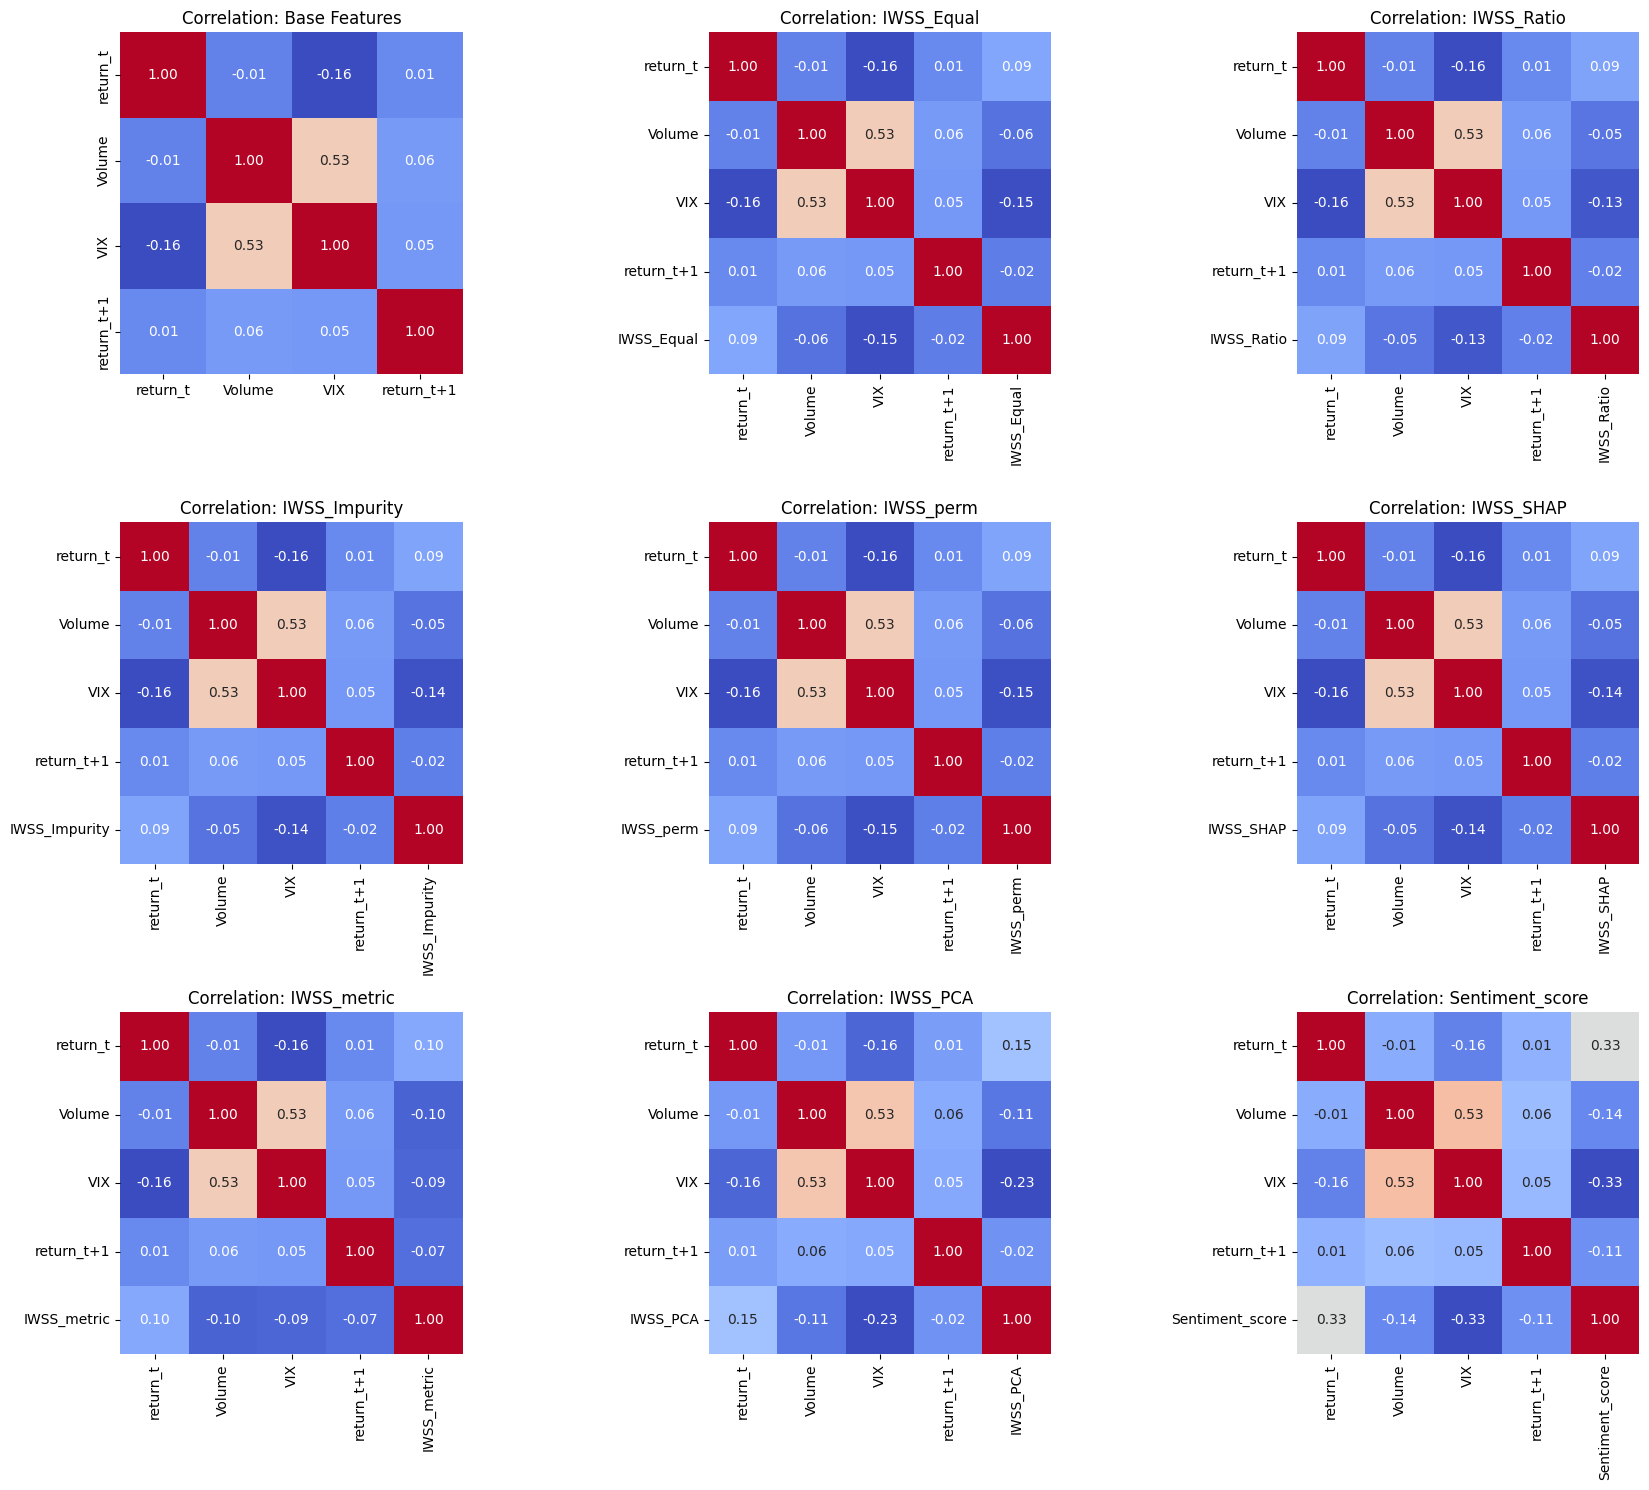

In [8]:
# -------------------------
# Correlation matrix heatmap
# -------------------------

# Define variables
target = 'return_t+1'
base_features = ['return_t', 'Volume', 'VIX']
sentiment_features = ['IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm',
       'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA', 'Sentiment_score']

feature_sets = [base_features + [target]] + [base_features + [target, feat] for feat in sentiment_features]
titles = ['Base Features'] + [f'{feat}' for feat in sentiment_features]


n_cols = 3
n_rows = (len(feature_sets) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

for idx, (features_subset, title) in enumerate(zip(feature_sets, titles)):
    row, col = divmod(idx, n_cols)
    ax = axes[row, col] if n_rows > 1 else axes[col]
    df_subset = df_train[features_subset]
    corr_matrix = df_subset.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax, cbar=False)
    ax.set_title(f'Correlation: {title}')

# Turn off unused axes
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

The correlation matrix reveal that the base features—return_t, Volume, and VIX—have very weak linear relationships with the target variable return_t+1, with correlation coefficients close to zero. This is likely due to the fact that many other variables were excluded including macroeconoic factors. However, for the sake of simplicity we choose to stick with this base. However, two features stand out: IWSS_PCA and Sentiment_score. IWSS_PCA demonstrates the strongest negative correlation with return_t+1 (-0.23), while Sentiment_score shows a moderate negative correlation (-0.14) with return_t+1 and a notable positive correlation (0.33) with return_t. These results suggest that, although the linear relationships are generally weak, certain sentiment features may still carry predictive information—especially if nonlinear interactions exist. This insight implies that models capable of capturing nonlinear dependencies, such as Random Forest or Gradient Boosting Machines, may perform better than linear models like OLS in leveraging the sentiment data for predicting future returns.


"Sentiment_score is negatively correlated with return_t+1",

It means:

When sentiment is more positive, the next-day return (return_t+1) tends to be lower.

Conversely, when sentiment is more negative, returns tend to be higher.

Market overreaction: Positive sentiment might reflect overpriced conditions, leading to a correction.

Contrarian behavior: Markets sometimes behave in the opposite direction of the crowd’s emotion.

Lagged information: Sentiment may reflect what's already priced in, not what's coming next.



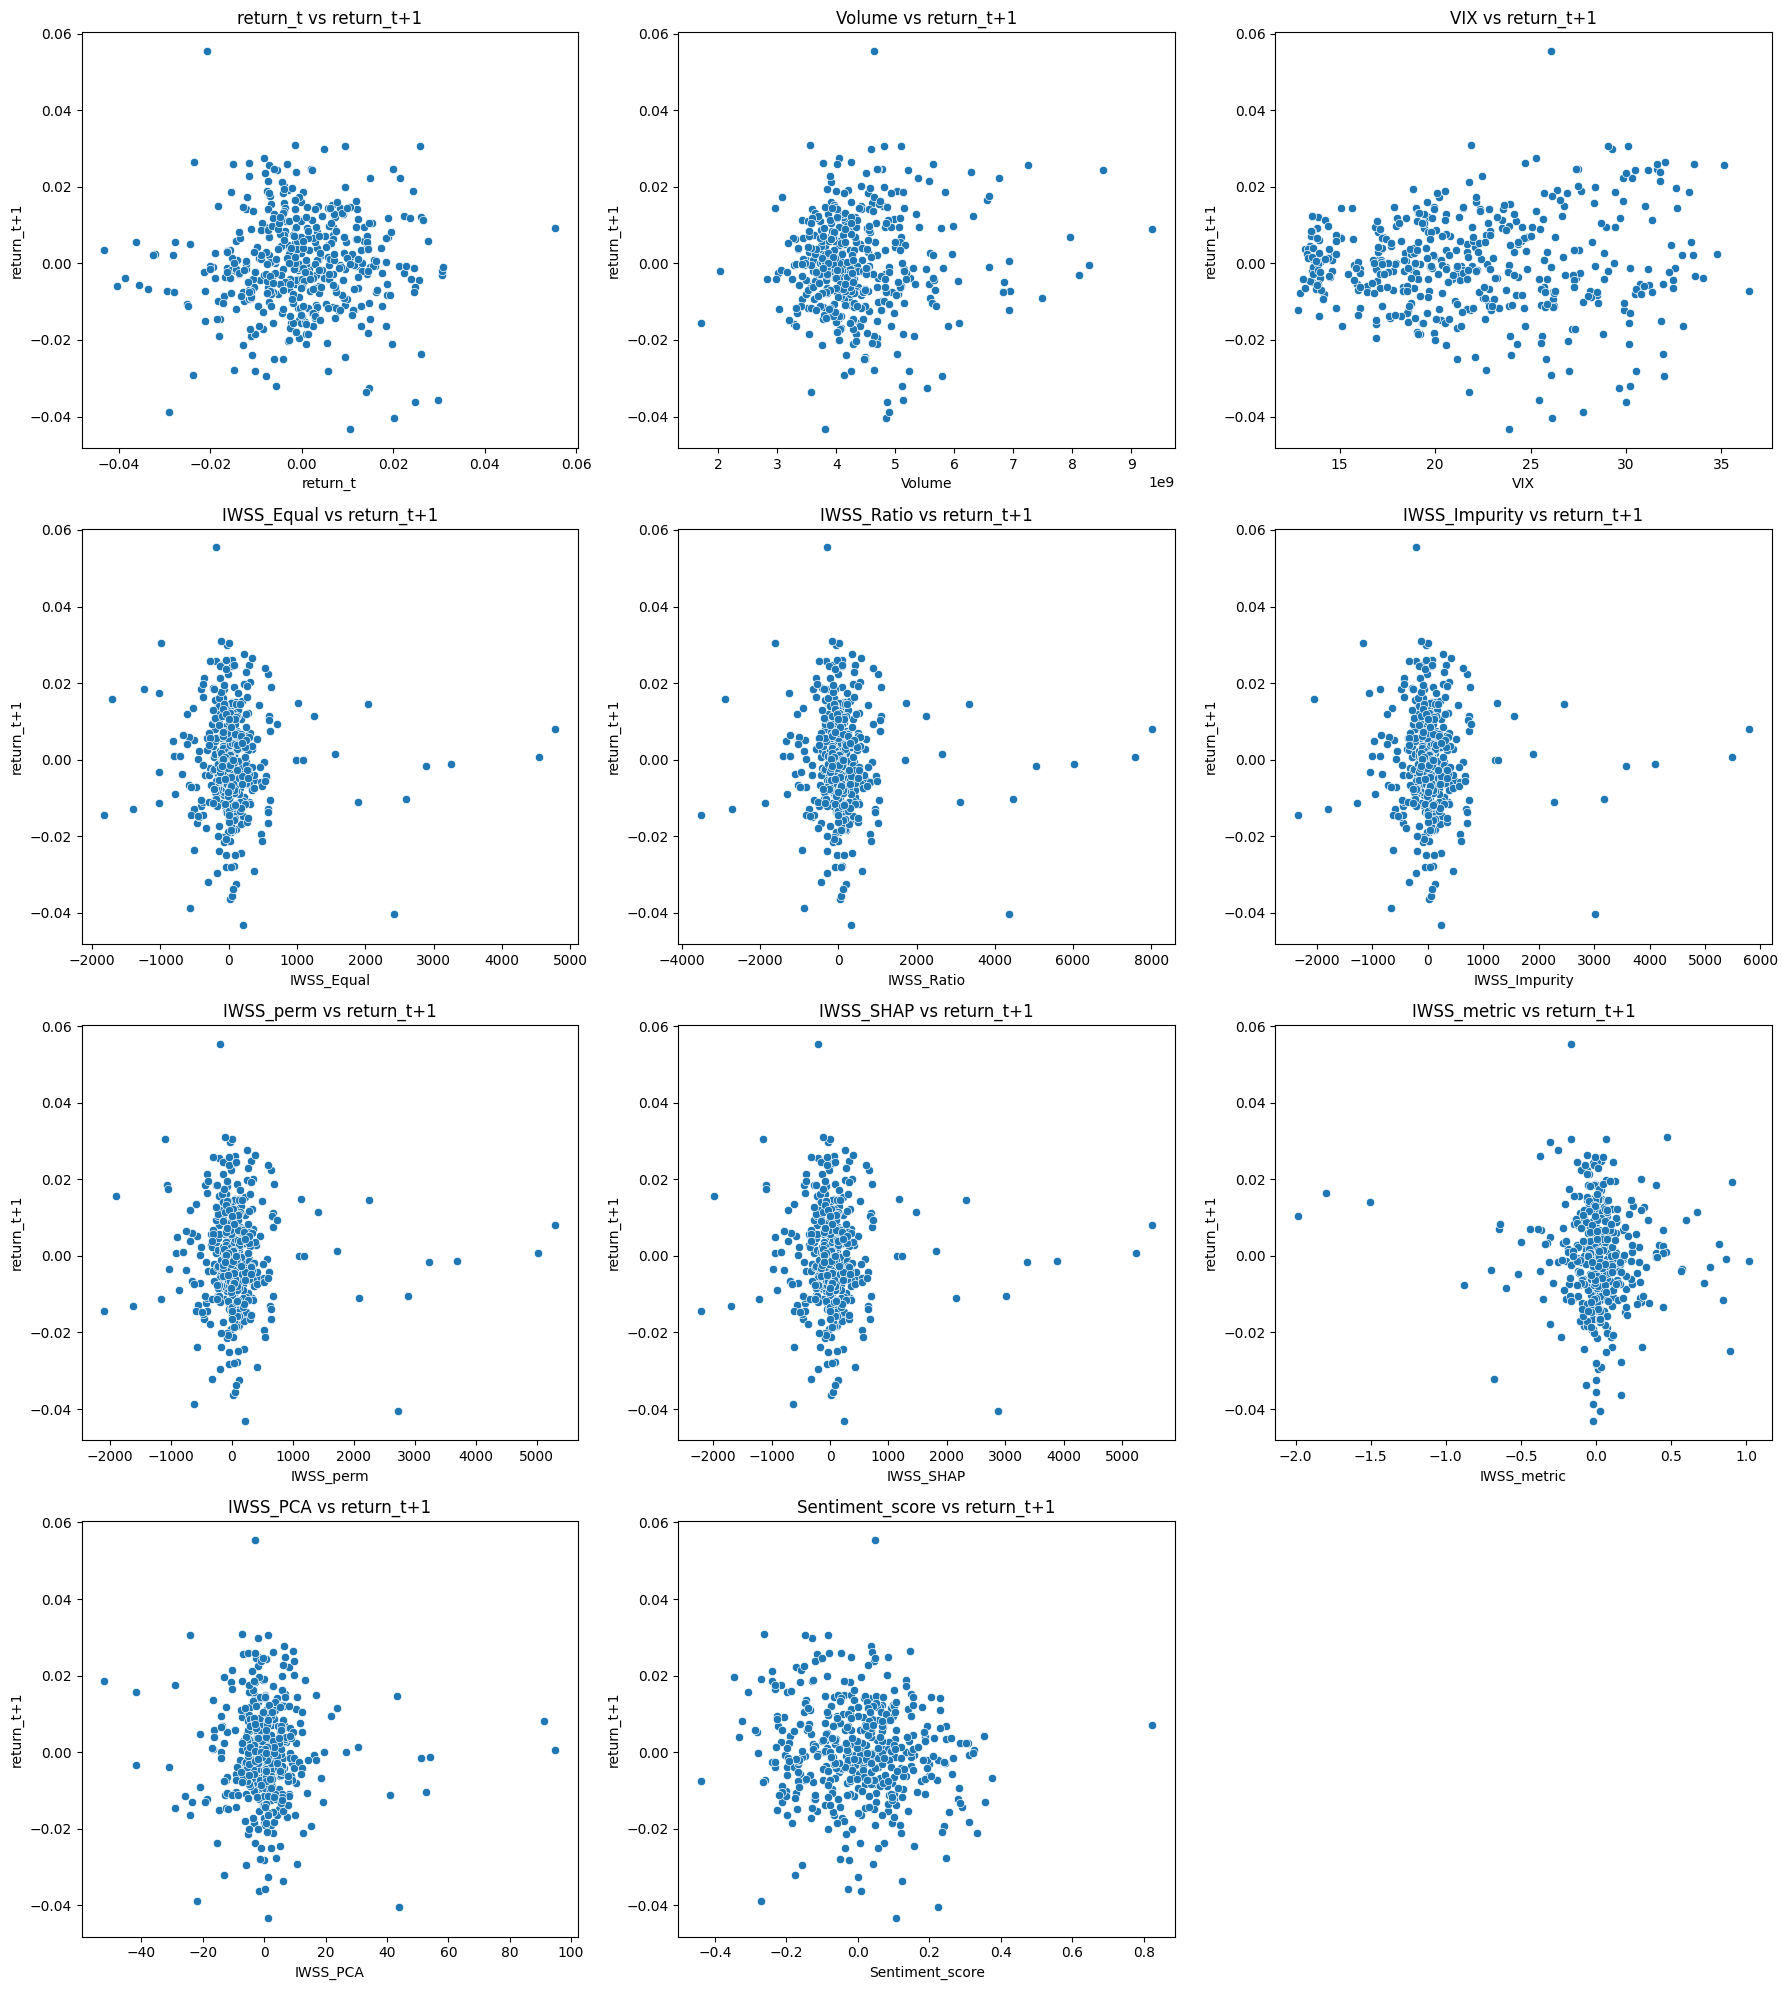

In [9]:
# Filter for features that exist in the DataFrame
valid_features = [f for f in base_features + sentiment_features if f in df_train.columns]

# Plot scatter plots for each valid feature against the target
n_cols = 3
n_rows = (len(valid_features) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(valid_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=df_train[col], y=df_train[target])
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()


The scatter plots show that both base features (return_t, Volume, VIX) and sentiment features (IWSS_*, Sentiment_score) have weak or no clear linear relationship with the target variable return_t+1. Most plots display a diffuse cloud of points without a strong trend, indicating low predictive value in a linear context. However, features like IWSS_PCA and Sentiment_score show slight negative patterns, suggesting potential nonlinear relationships. These observations imply that while linear models like OLS may struggle, nonlinear models such as Random Forest or Gradient Boosting and LSTM may better capture underlying patterns in the data.

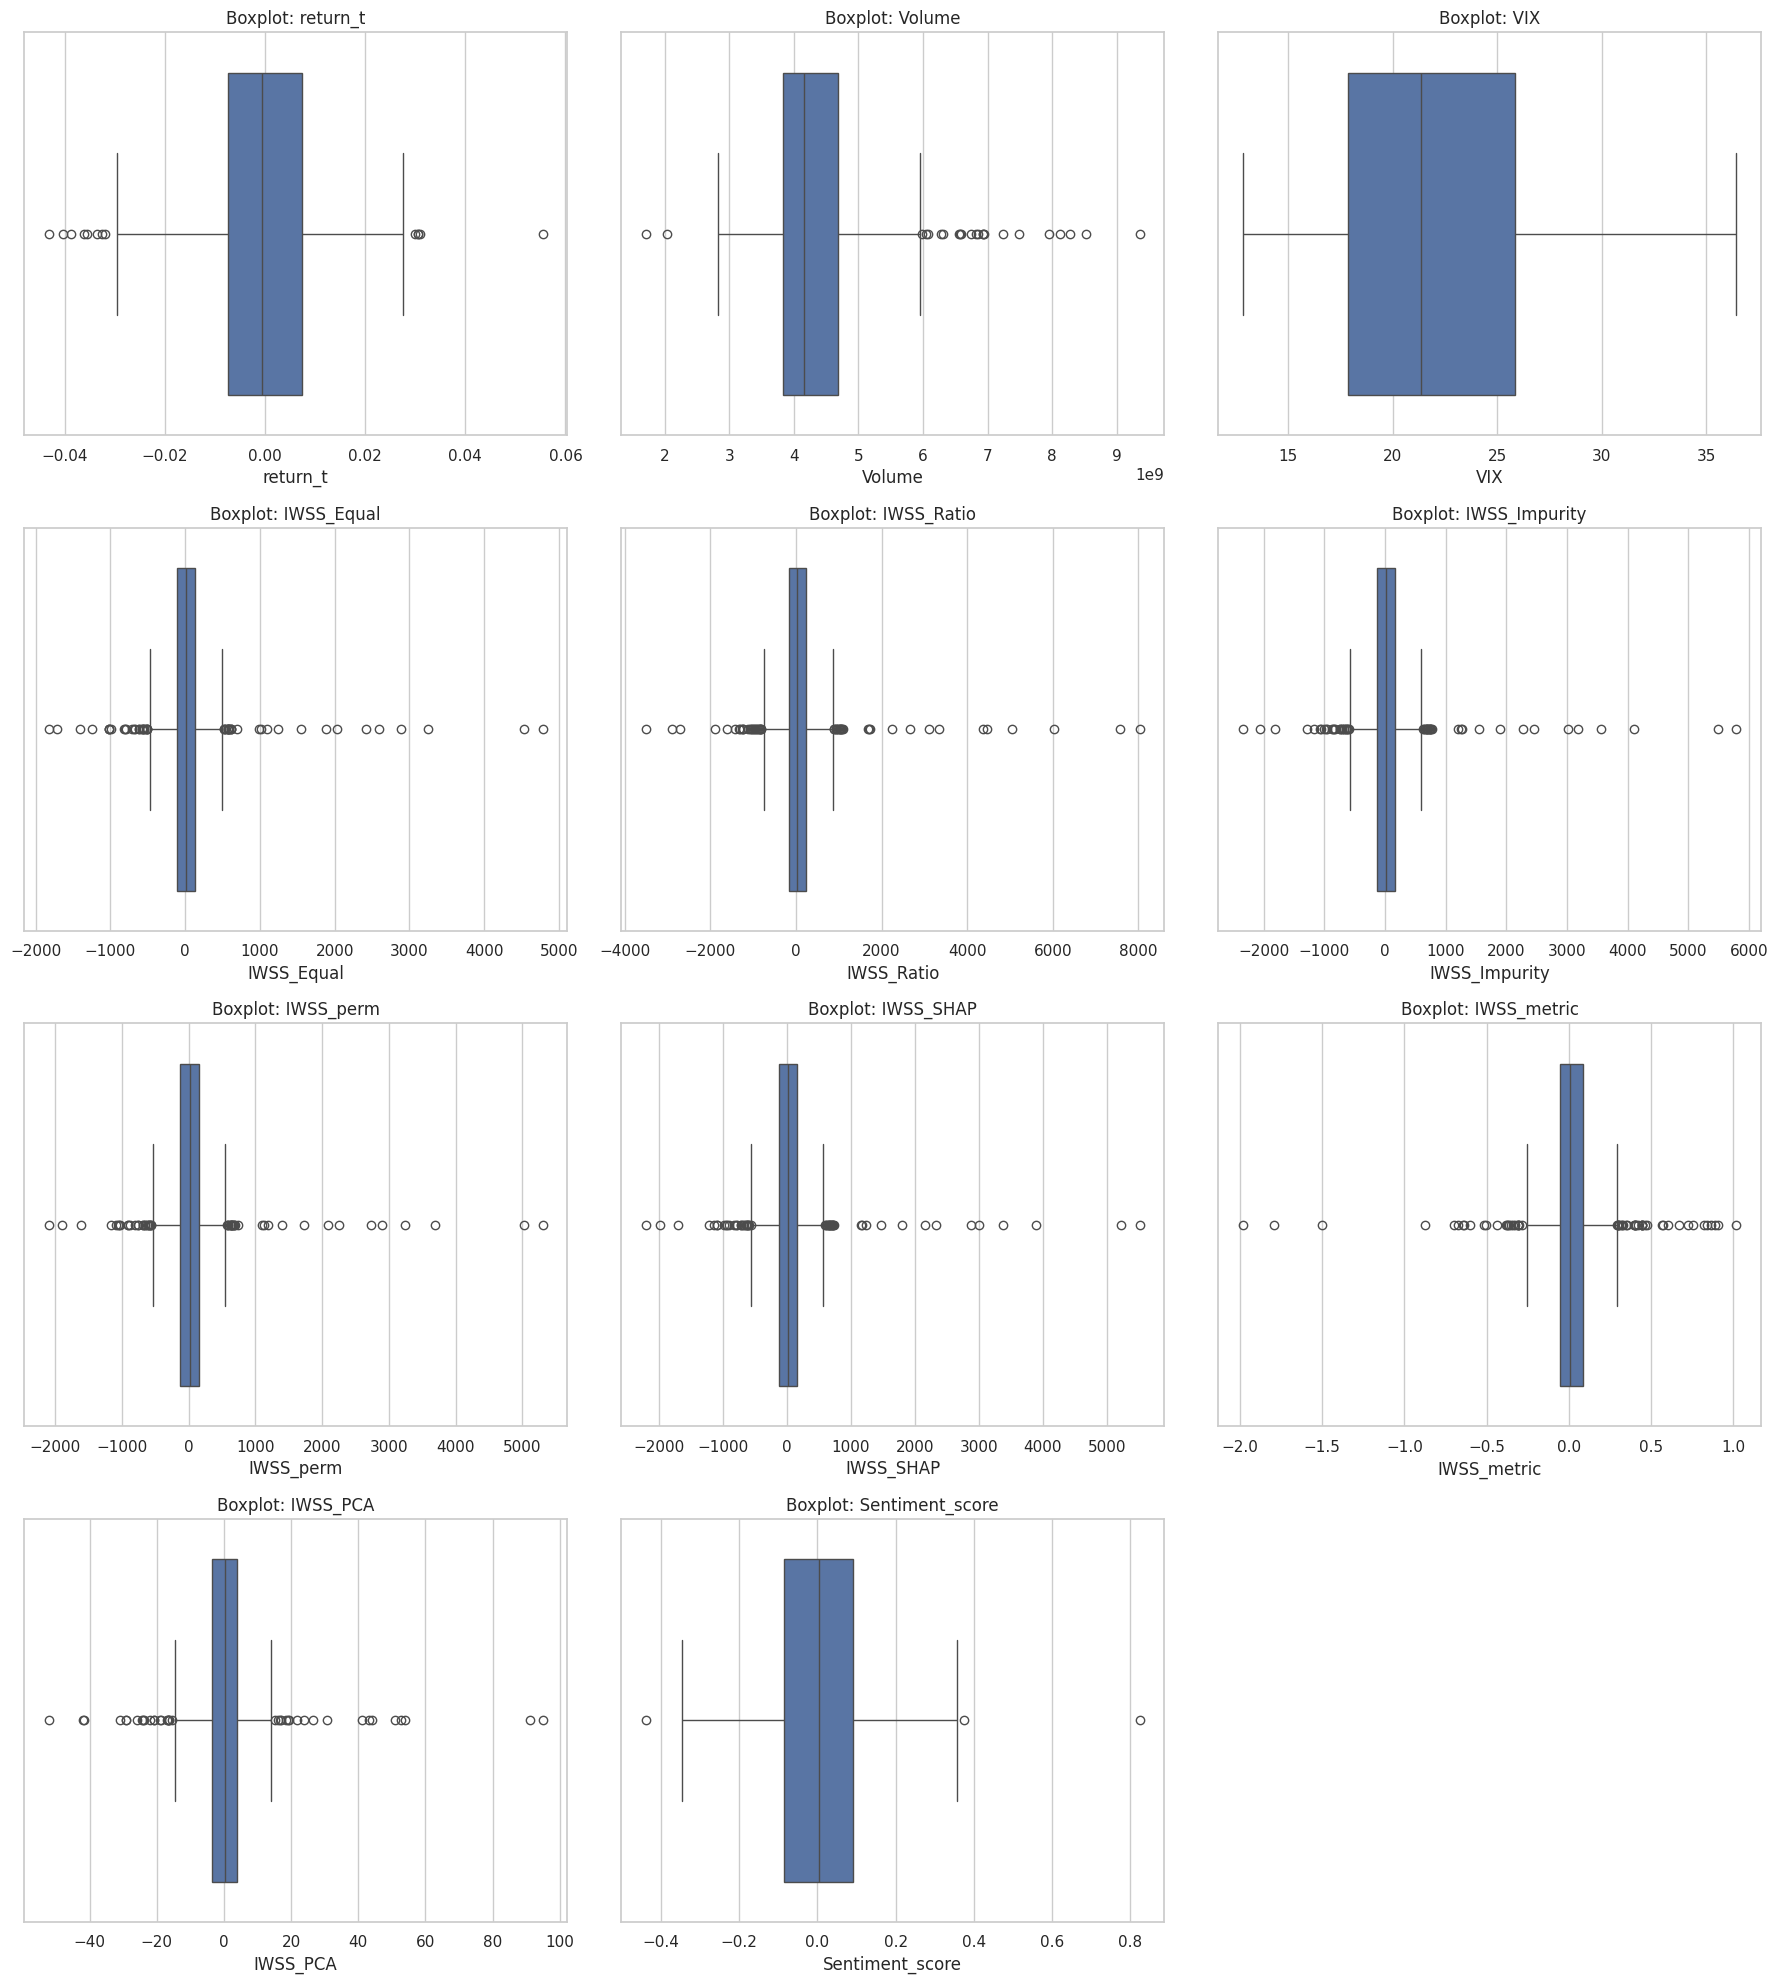

In [18]:
boxplot_features = [f for f in base_features + sentiment_features if f in df_train.columns]

# Plot boxplots
n_cols = 3
n_rows = (len(boxplot_features) + n_cols - 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(boxplot_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()


The boxplots of the base and sentiment features reveal that several variables exhibit skewed distributions and contain notable outliers. Among the base features, return_t is centered around zero with a balanced spread and mild outliers, while Volume shows right skewness and a long tail, indicating high variability in trading activity. VIX appears more symmetric, with a moderate range. The sentiment features, particularly the IWSS_* variables, are tightly clustered near zero but display a substantial number of extreme outliers, suggesting that their distributions are highly variable and may contain influential values. Notably, IWSS_PCA is strongly right-skewed, and Sentiment_score is more balanced but still includes a few extreme values. These patterns imply that models sensitive to distributional assumptions, such as OLS, may be affected unless transformations or robust methods are applied. In contrast, non-parametric models like Random Forest are generally well-suited to handling skewed and outlier-prone features without requiring extensive preprocessing.

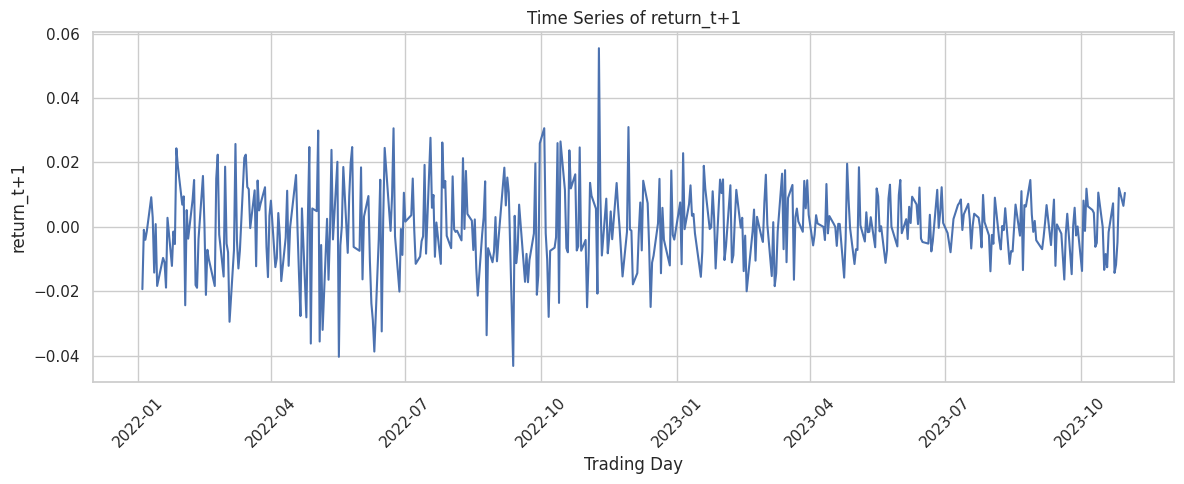

In [19]:
# Time series plot of target variable
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_train['trading_day'], y=df_train['return_t+1'])
plt.title('Time Series of return_t+1')
plt.xlabel('Trading Day')
plt.ylabel('return_t+1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This time series plot of return_t+1 over the trading days shows a highly volatile, non-stationary, and noisy pattern, which is typical of financial return data. The values fluctuate around zero without a clear trend or seasonality, though some periods (e.g., mid-2022) show increased spikes and dips, possibly reflecting market shocks or volatility bursts.



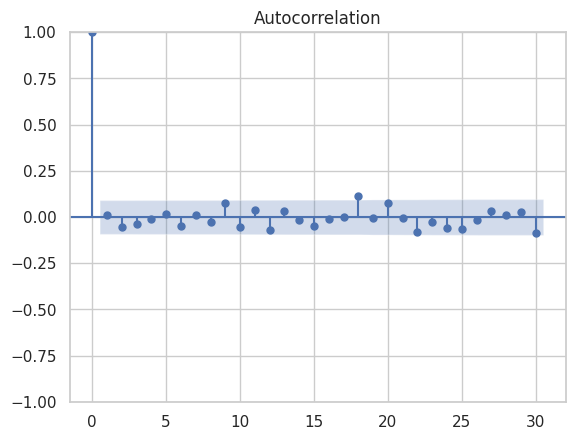

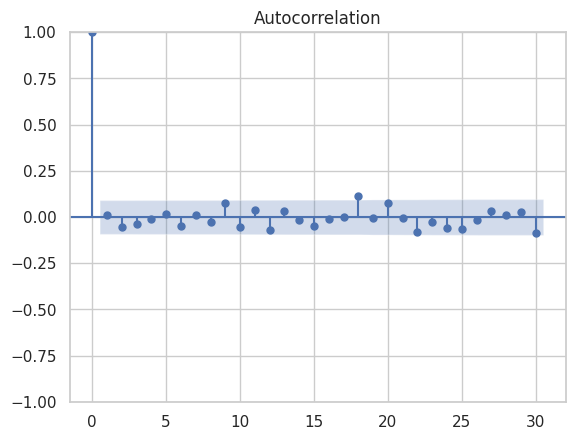

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_train['return_t+1'].dropna(), lags=30)

The lags fall within the confidence bounds, suggesting very little autocorrelation. That indicates that past values don't strongly predict future values in a linear way. Time for next day return is therefore not an important element in simple autoregressive sense, therefore ARIMA is not necessary. However, we should consider non-linear dependencies that could be detected by LSTMs. Perhaps higher order features like rolling stats may be necessary

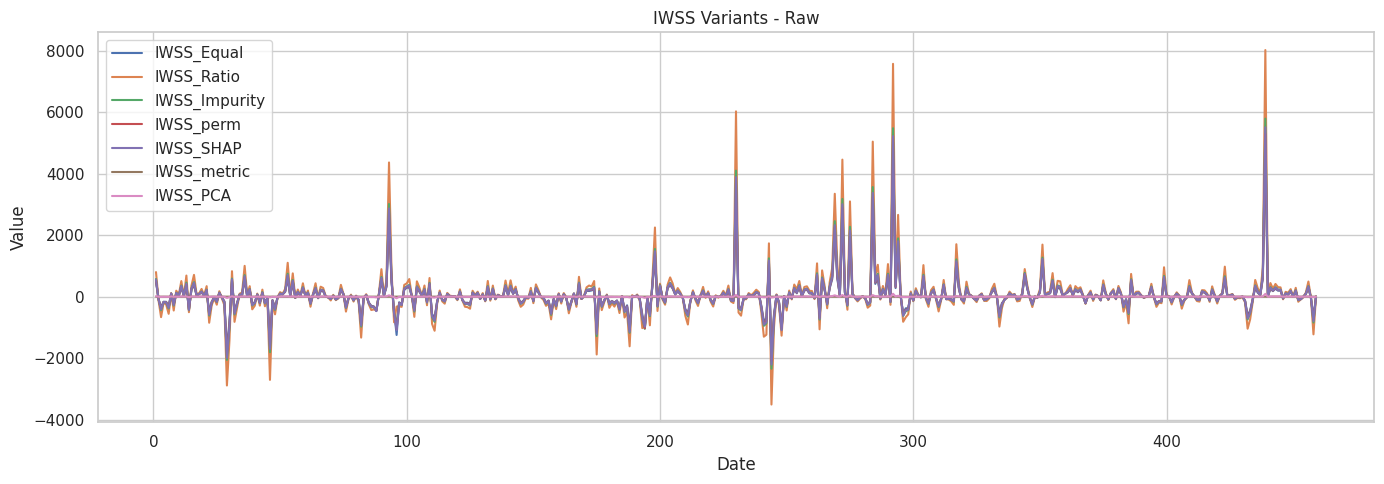

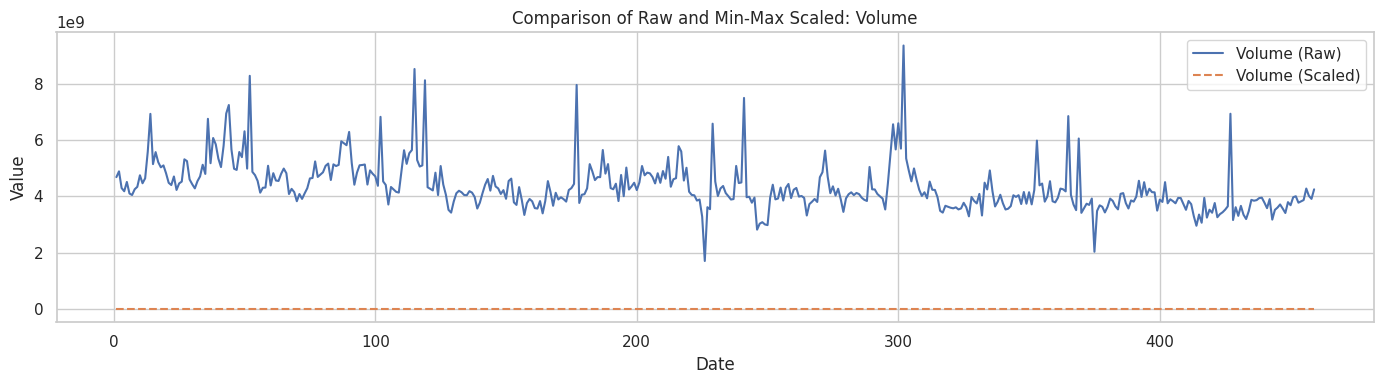

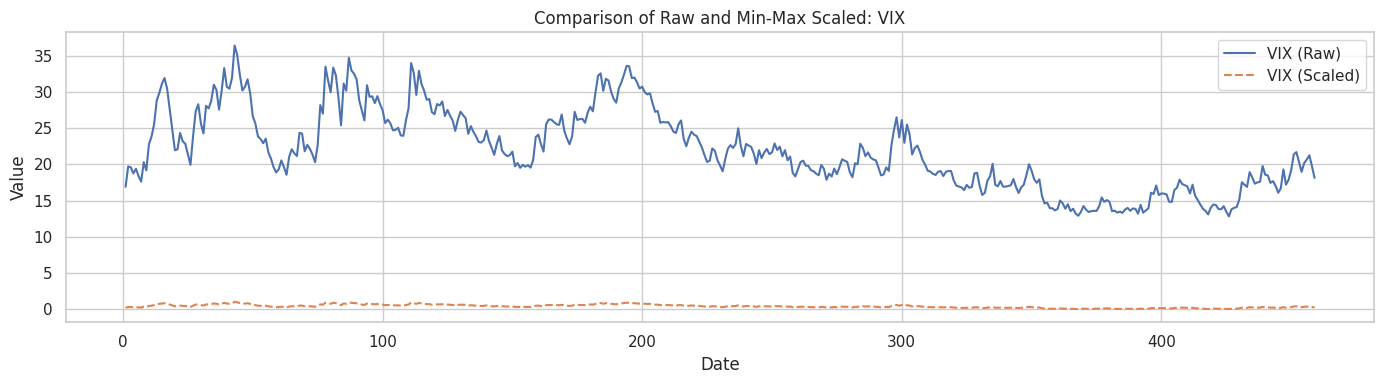

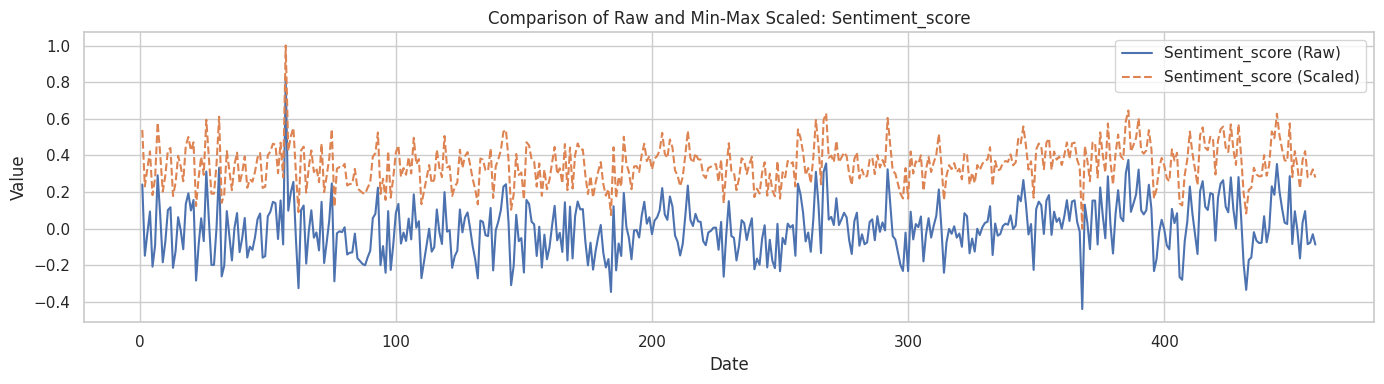

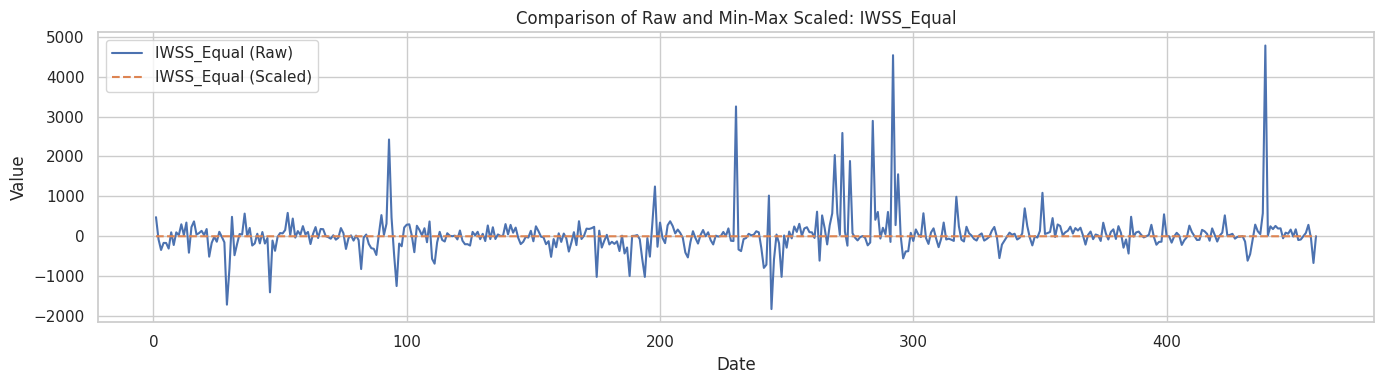

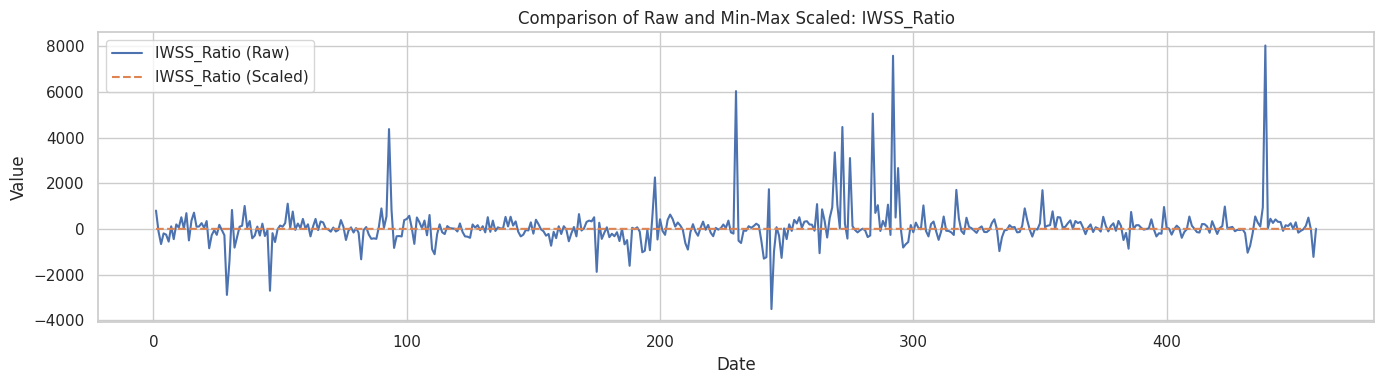

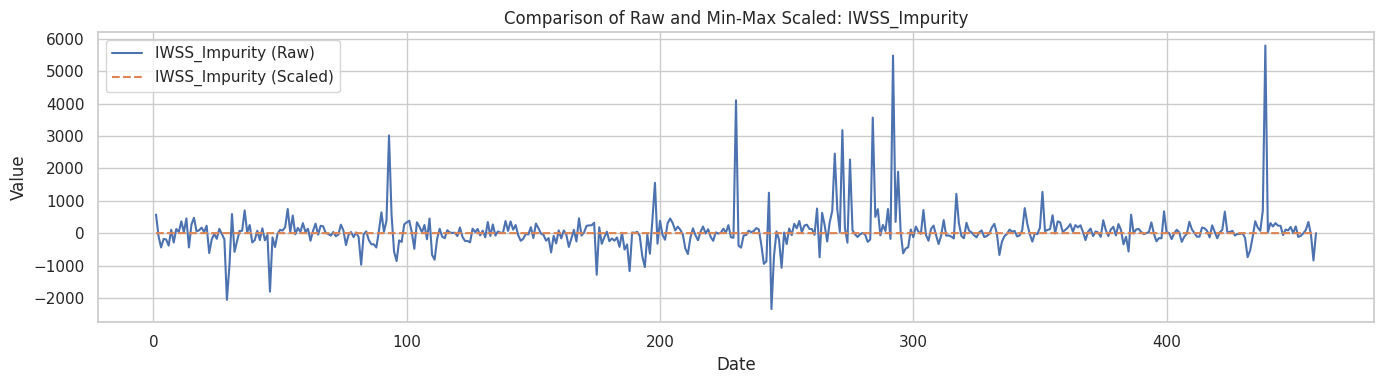

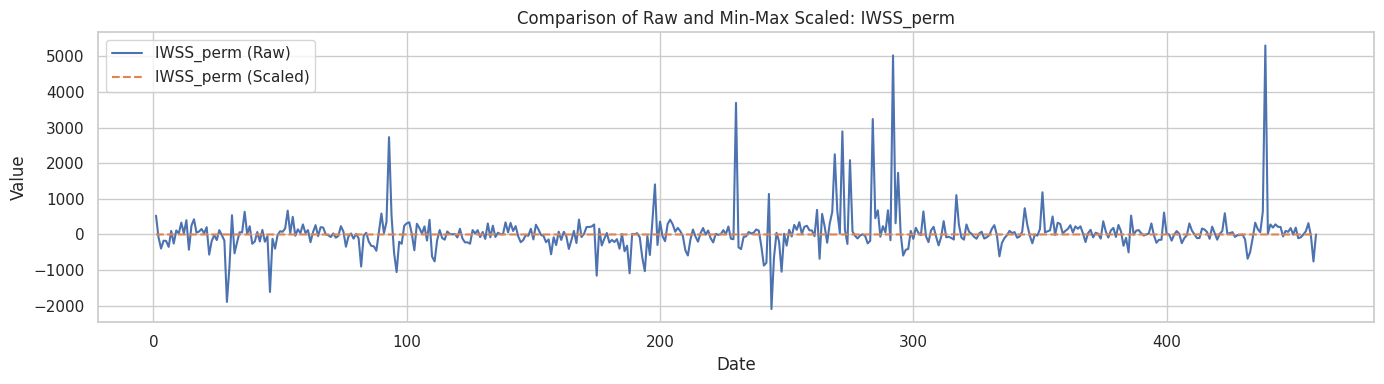

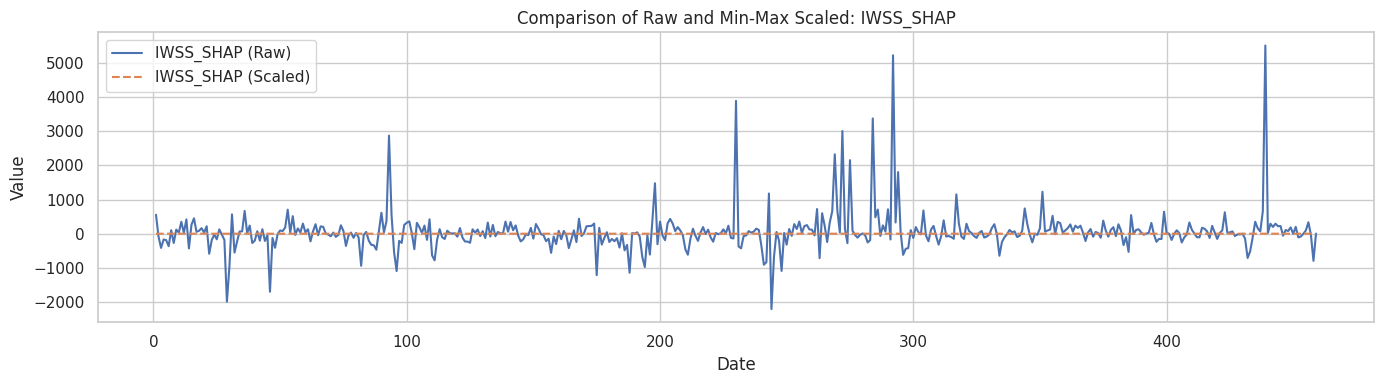

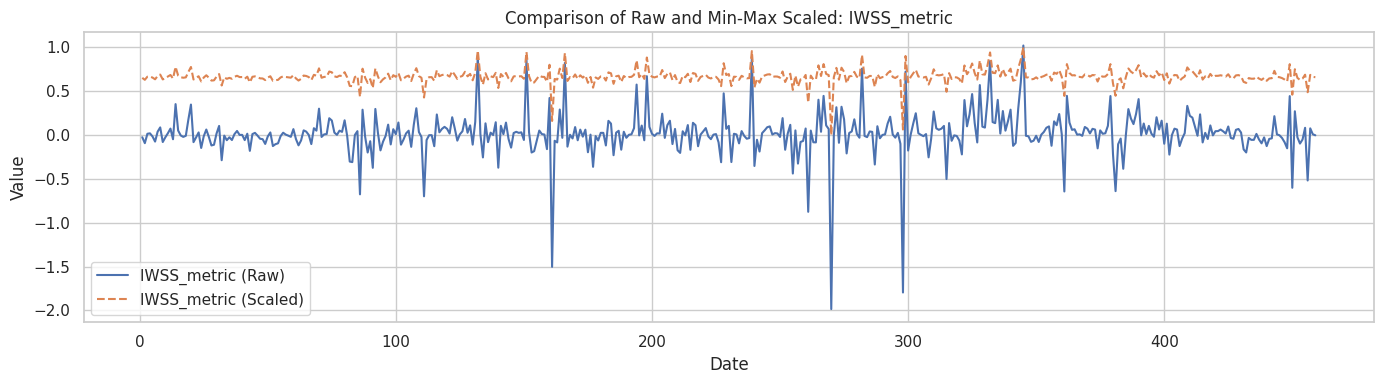

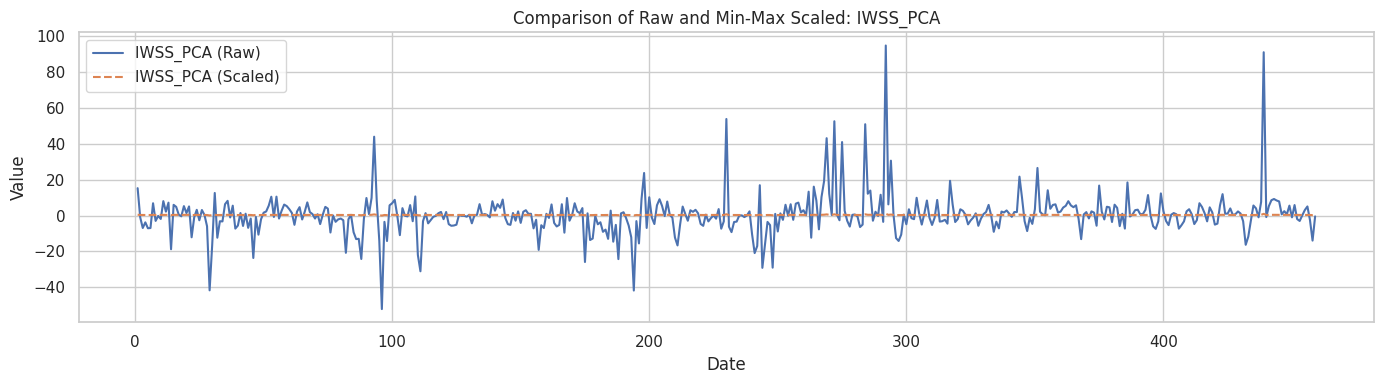

In [20]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

variables = ['return_t+1', 'return_t', 'Volume', 'VIX', 'Sentiment_score', 'IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity',
             'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']

# ---- Scaling the data ----
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_train[variables])
df_scaled = pd.DataFrame(scaled, columns=[f"{col}_scaled" for col in variables], index=df_train.index)

df_train = pd.concat([df_train, df_scaled], axis=1)


# ----- Time sries plots ----
plt.figure(figsize=(14, 5))
for col in ['IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']:
    plt.plot(df_train.index, df_train[col], label=col)
plt.title("IWSS Variants - Raw")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for var in ['Volume', 'VIX', 'Sentiment_score', 'IWSS_Equal',
            'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']:
    raw = df_train[var]
    scaled = df_train[f"{var}_scaled"]

    plt.figure(figsize=(14, 4))
    plt.plot(df_train.index, raw, label=f'{var} (Raw)')
    plt.plot(df_train.index, scaled, label=f'{var} (Scaled)', linestyle='--')
    plt.title(f"Comparison of Raw and Min-Max Scaled: {var}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Some variants (e.g., IWSS_Ratio, IWSS_SHAP) exhibit more extreme spikes, possibly emphasizing certain features more heavily.

Others (like IWSS_metric or IWSS_PCA) appear more stable or smoothed, possibly indicating a more conservative or aggregated selection.

All variants fluctuate around zero but with varying amplitude, which may affect model sensitivity and generalization.

Normalization should still be done within each variant-based model.

Cross-validation will be crucial to assess generalization across IWSS variants.

Consider tracking feature importance and model robustness per variant to compare their real-world applicability.



Min-Max Scaling compresses all feature values into the [0, 1] range, which is especially useful for models sensitive to scale (e.g., KNN, neural networks, SVM).

It also preserves relative distances between values, which is important when keeping temporal patterns or volatility structure intact.

 Volume
Raw values range up to nearly 9 billion, showing very large magnitudes.

The scaled version hugs the bottom of the plot due to this massive range.

Important: This kind of scaling works well numerically, but it may hide the visual interpretability unless viewed on its own scale. You may consider log-scaling before Min-Max scaling for better numerical stability.

Fluctuates between ~13 and 36 in raw form, with trends over time.

Scaled version preserves the shape nicely.

Model implication: Ready to use post-scaling; temporal patterns are retained.

Sentiment_score
Raw scores range from ~-0.4 to ~0.7, mostly clustering near zero.

After scaling, the feature appears much less volatile (flat-looking).

Note: Since the raw sentiment already has a narrow range, you might consider standardization (z-score) instead of Min-Max to avoid compressing minor fluctuations

IWSS_Equal
Contains strong spikes (both positive and negative), which are preserved in shape after scaling.

Watch for outliers: If extreme values dominate Min-Max range, most values could become squished close together, reducing feature usefulness.

IWSS_metric
Appears more stable, but still has downward spikes in raw form.

Scaled version is flatter but retains overall structure.

Model-ready after scaling; consider if robust scaling or standardization gives better balance depending on distribution.



Watch for features like Volume and IWSS_Equal where outliers could dominate the scale — consider preprocessing like log transforms or winsorizing.



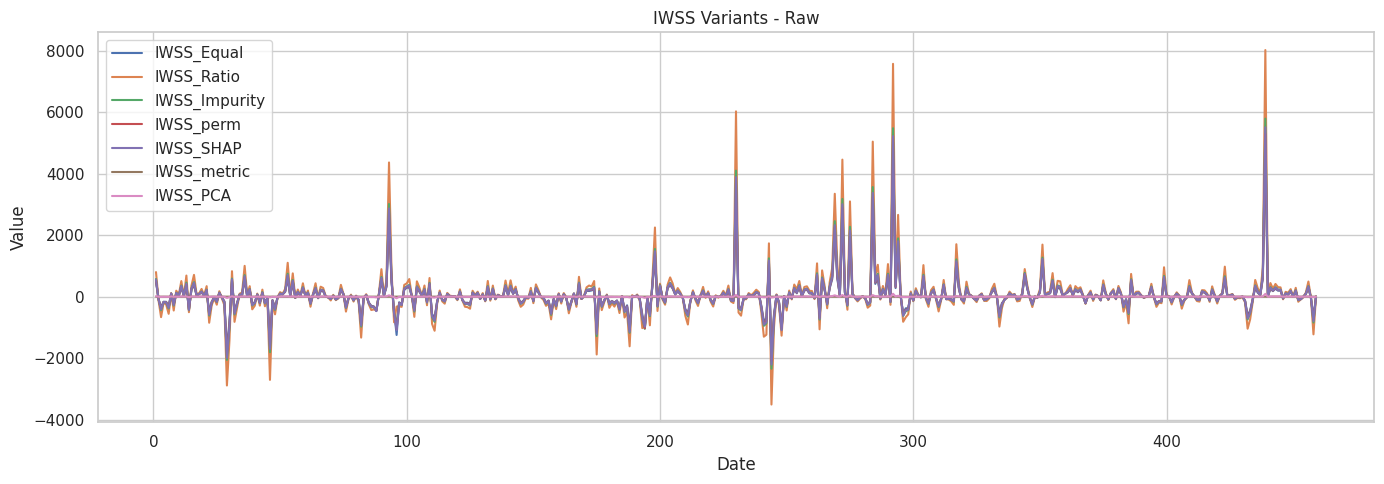

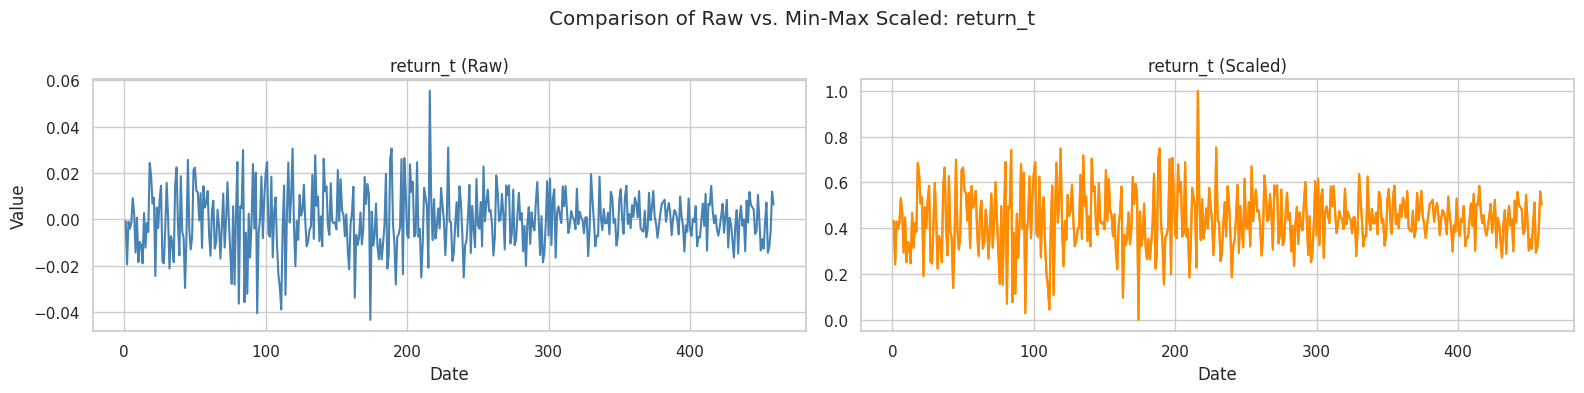

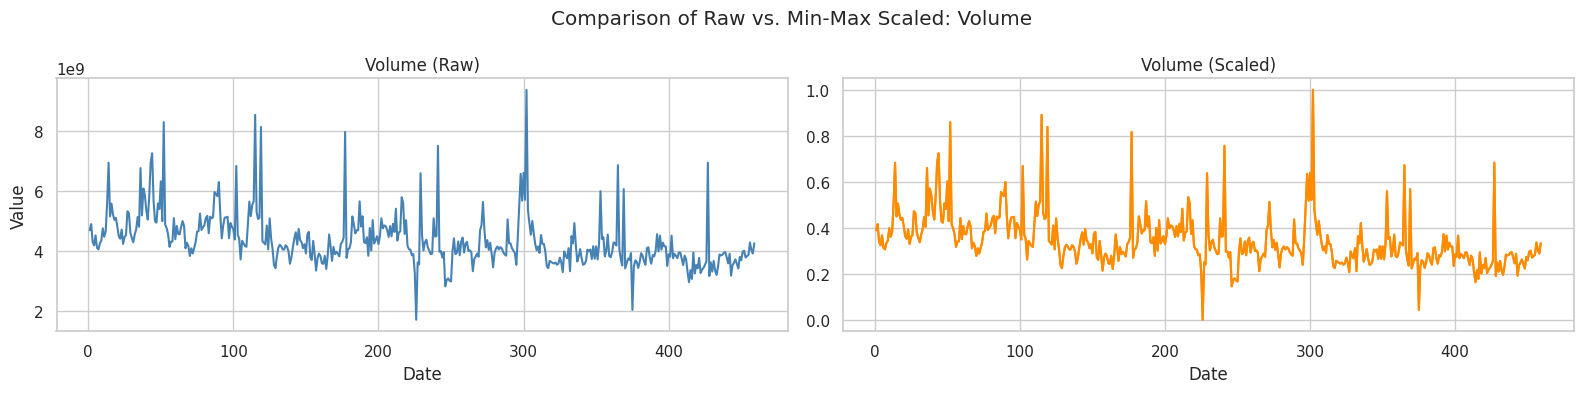

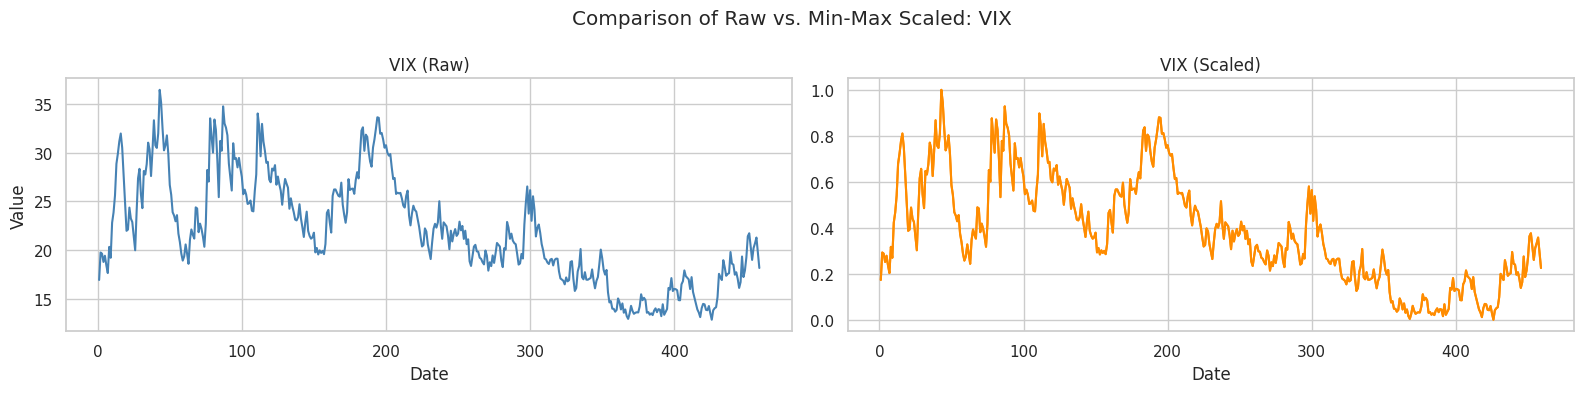

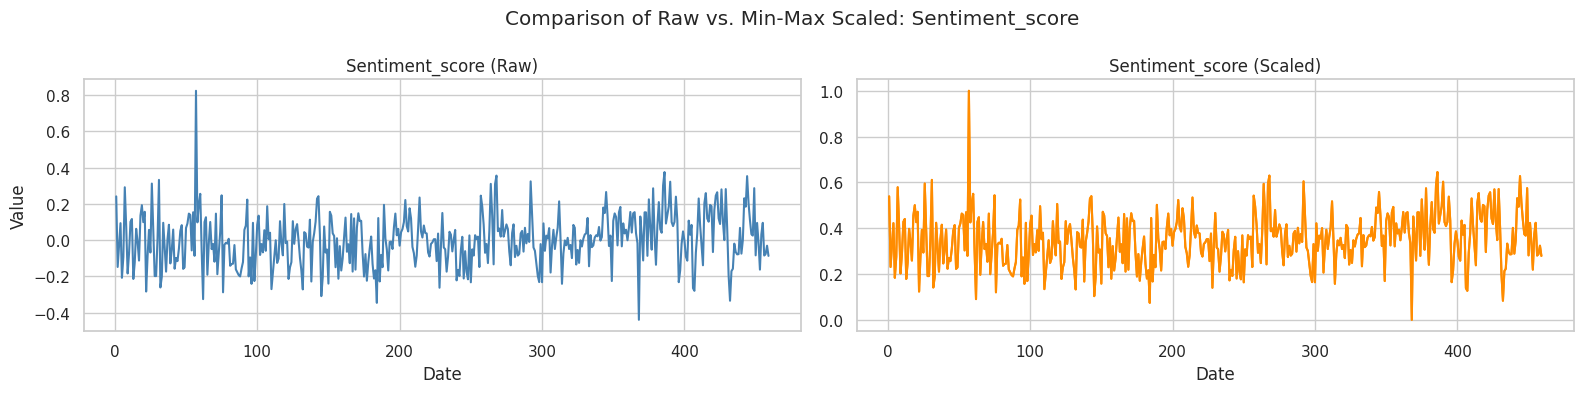

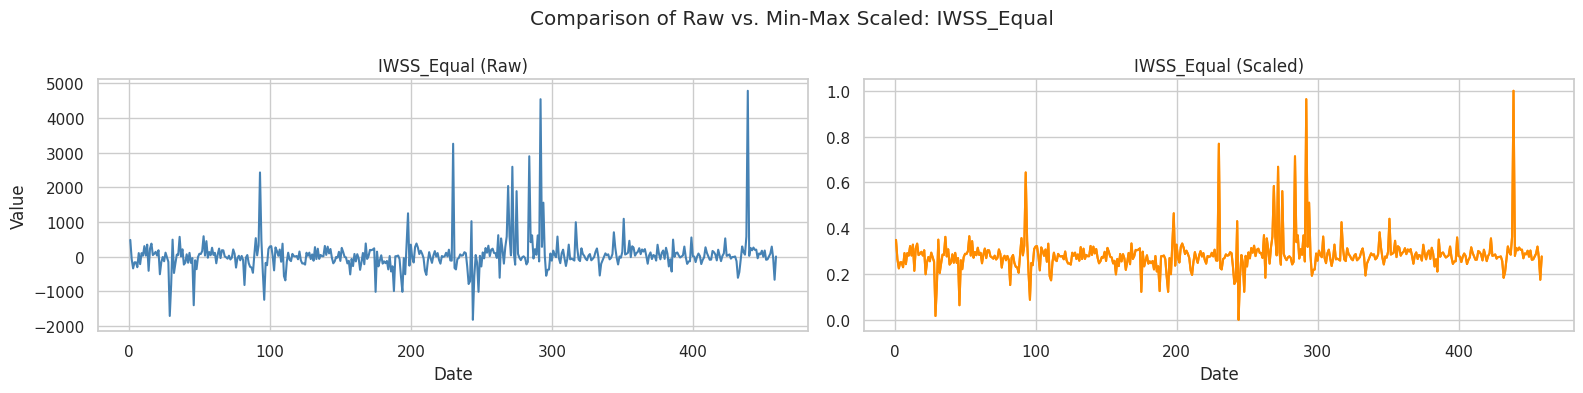

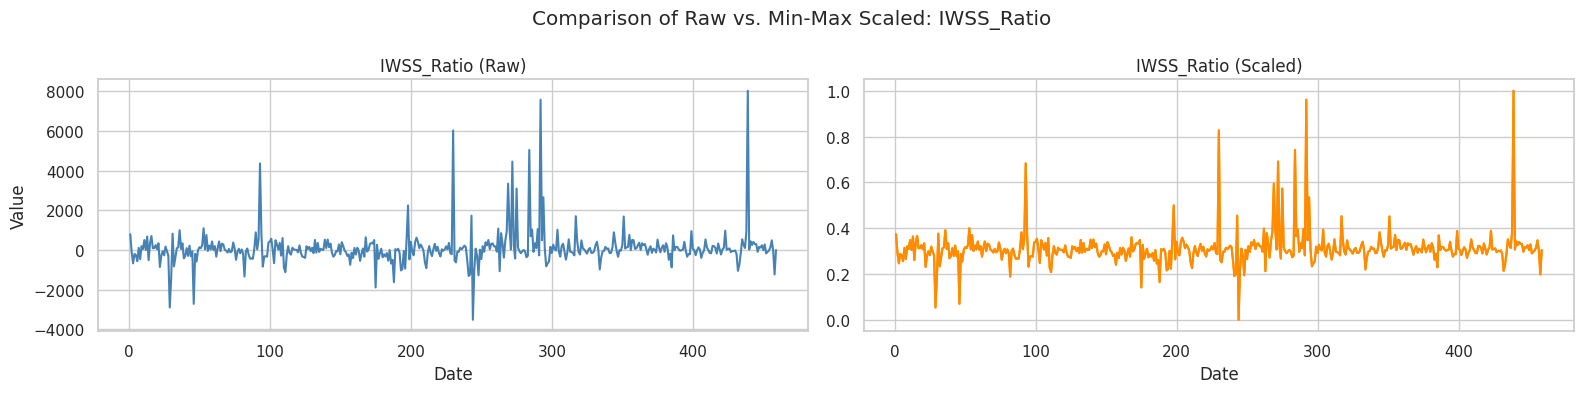

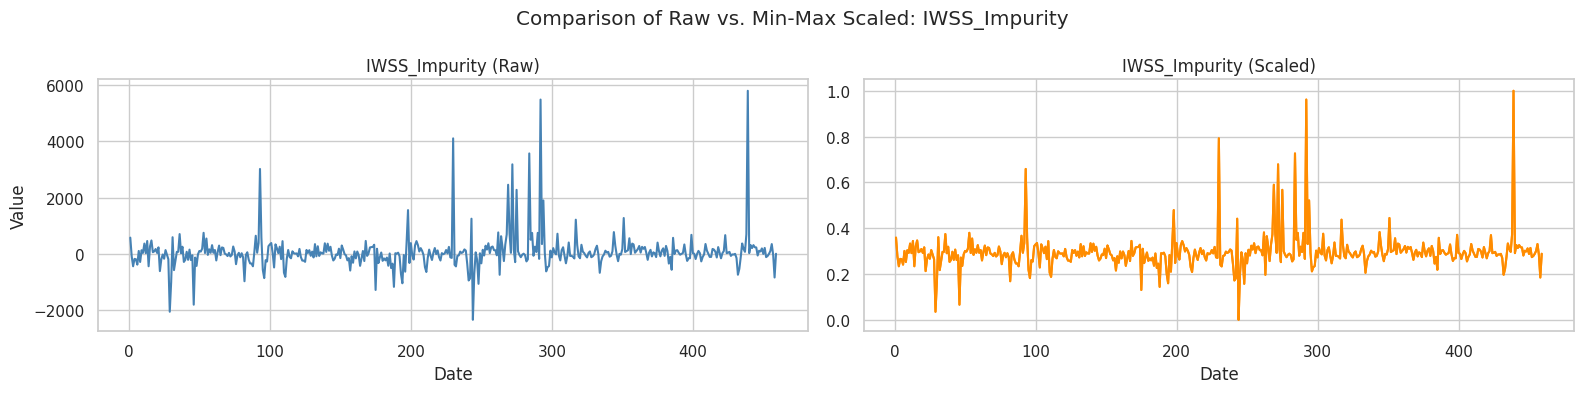

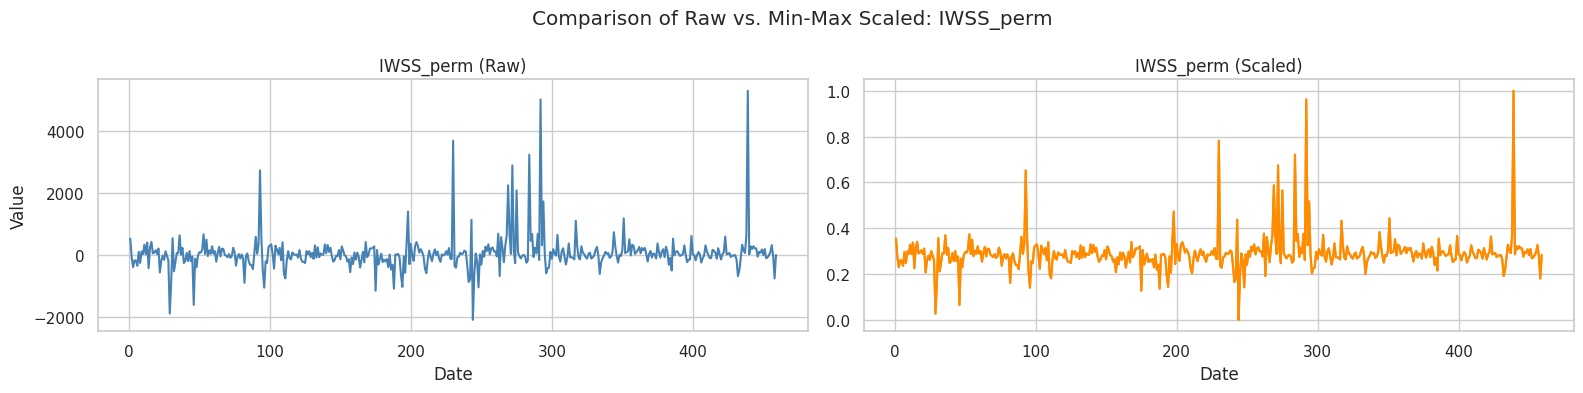

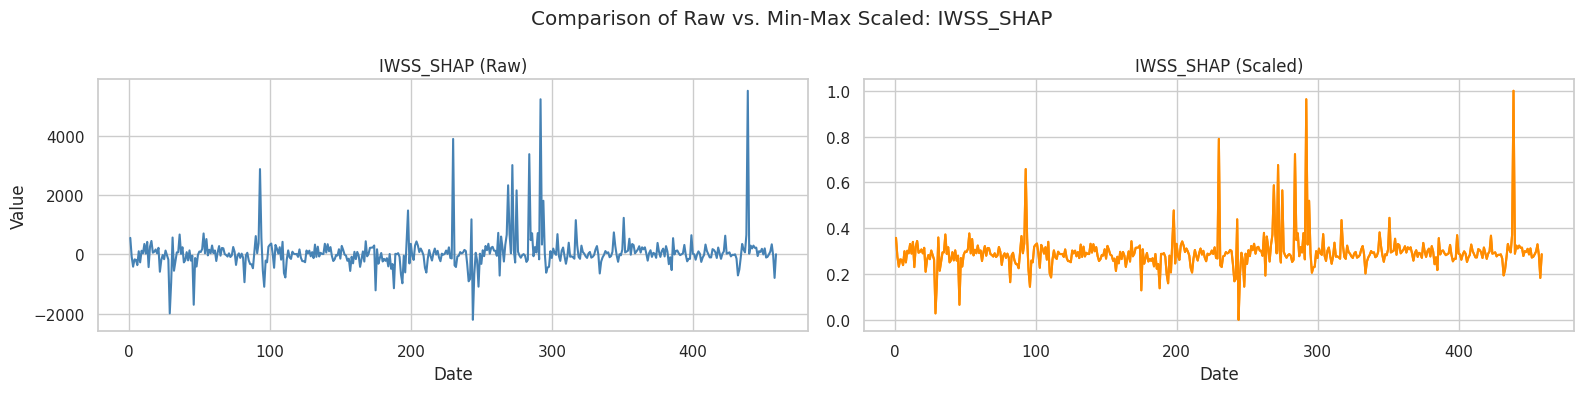

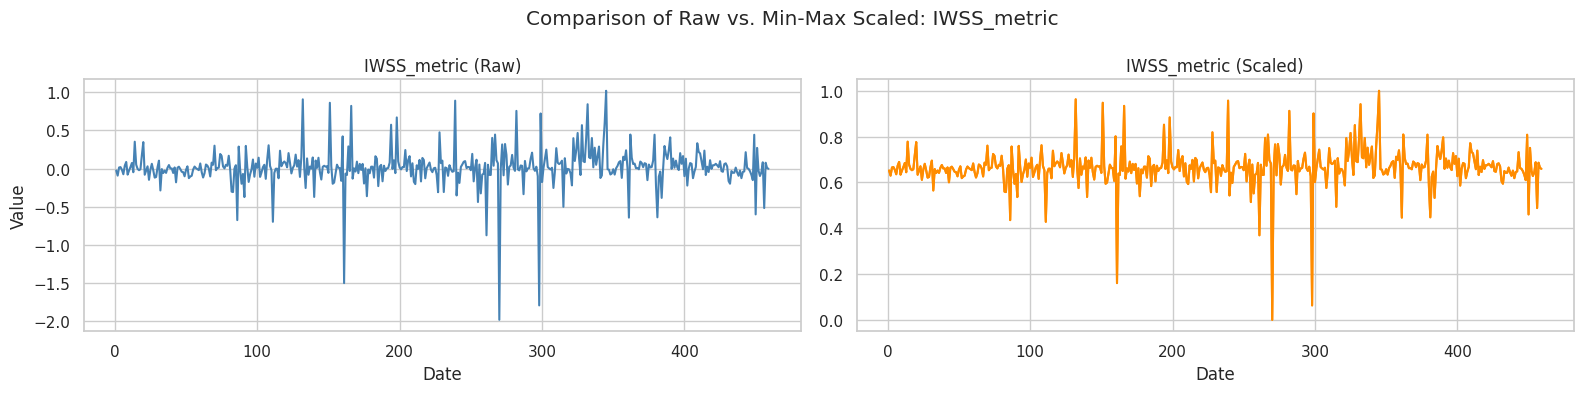

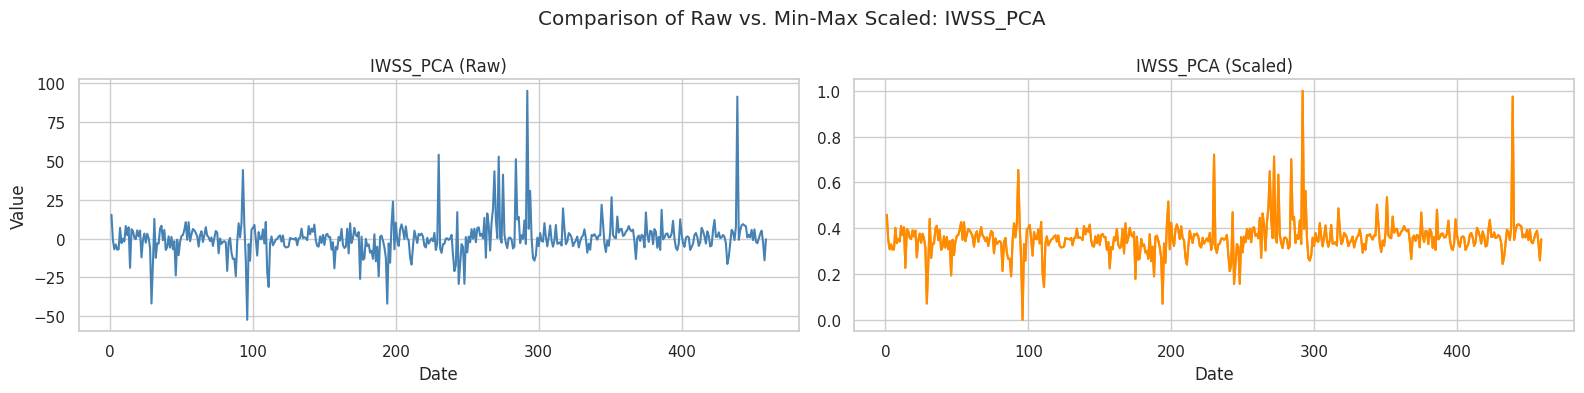

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

variables = ['return_t+1', 'return_t', 'Volume', 'VIX', 'Sentiment_score',
             'IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']

# --- Scale data ---
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_train[variables])
df_scaled = pd.DataFrame(scaled, columns=[f"{col}_scaled" for col in variables], index=df_train.index)
df_train = pd.concat([df_train, df_scaled], axis=1)

# --- Plot IWSS variants together (raw) ---
plt.figure(figsize=(14, 5))
for col in ['IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']:
    plt.plot(df_train.index, df_train[col], label=col)
plt.title("IWSS Variants - Raw")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Side-by-side plots for each variable ---
for var in ['return_t', 'Volume', 'VIX', 'Sentiment_score', 'IWSS_Equal',
            'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']:

    raw = df_train[var]
    scaled = df_train[f"{var}_scaled"]

    fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharex=True)

    # Raw plot
    axes[0].plot(df_train.index, raw, label='Raw', color='steelblue')
    axes[0].set_title(f'{var} (Raw)')
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Value")
    axes[0].grid(True)

    # Scaled plot
    axes[1].plot(df_train.index, scaled, label='Scaled', color='darkorange')
    axes[1].set_title(f'{var} (Scaled)')
    axes[1].set_xlabel("Date")
    axes[1].grid(True)

    plt.suptitle(f"Comparison of Raw vs. Min-Max Scaled: {var}")
    plt.tight_layout()
    plt.show()

These are much better

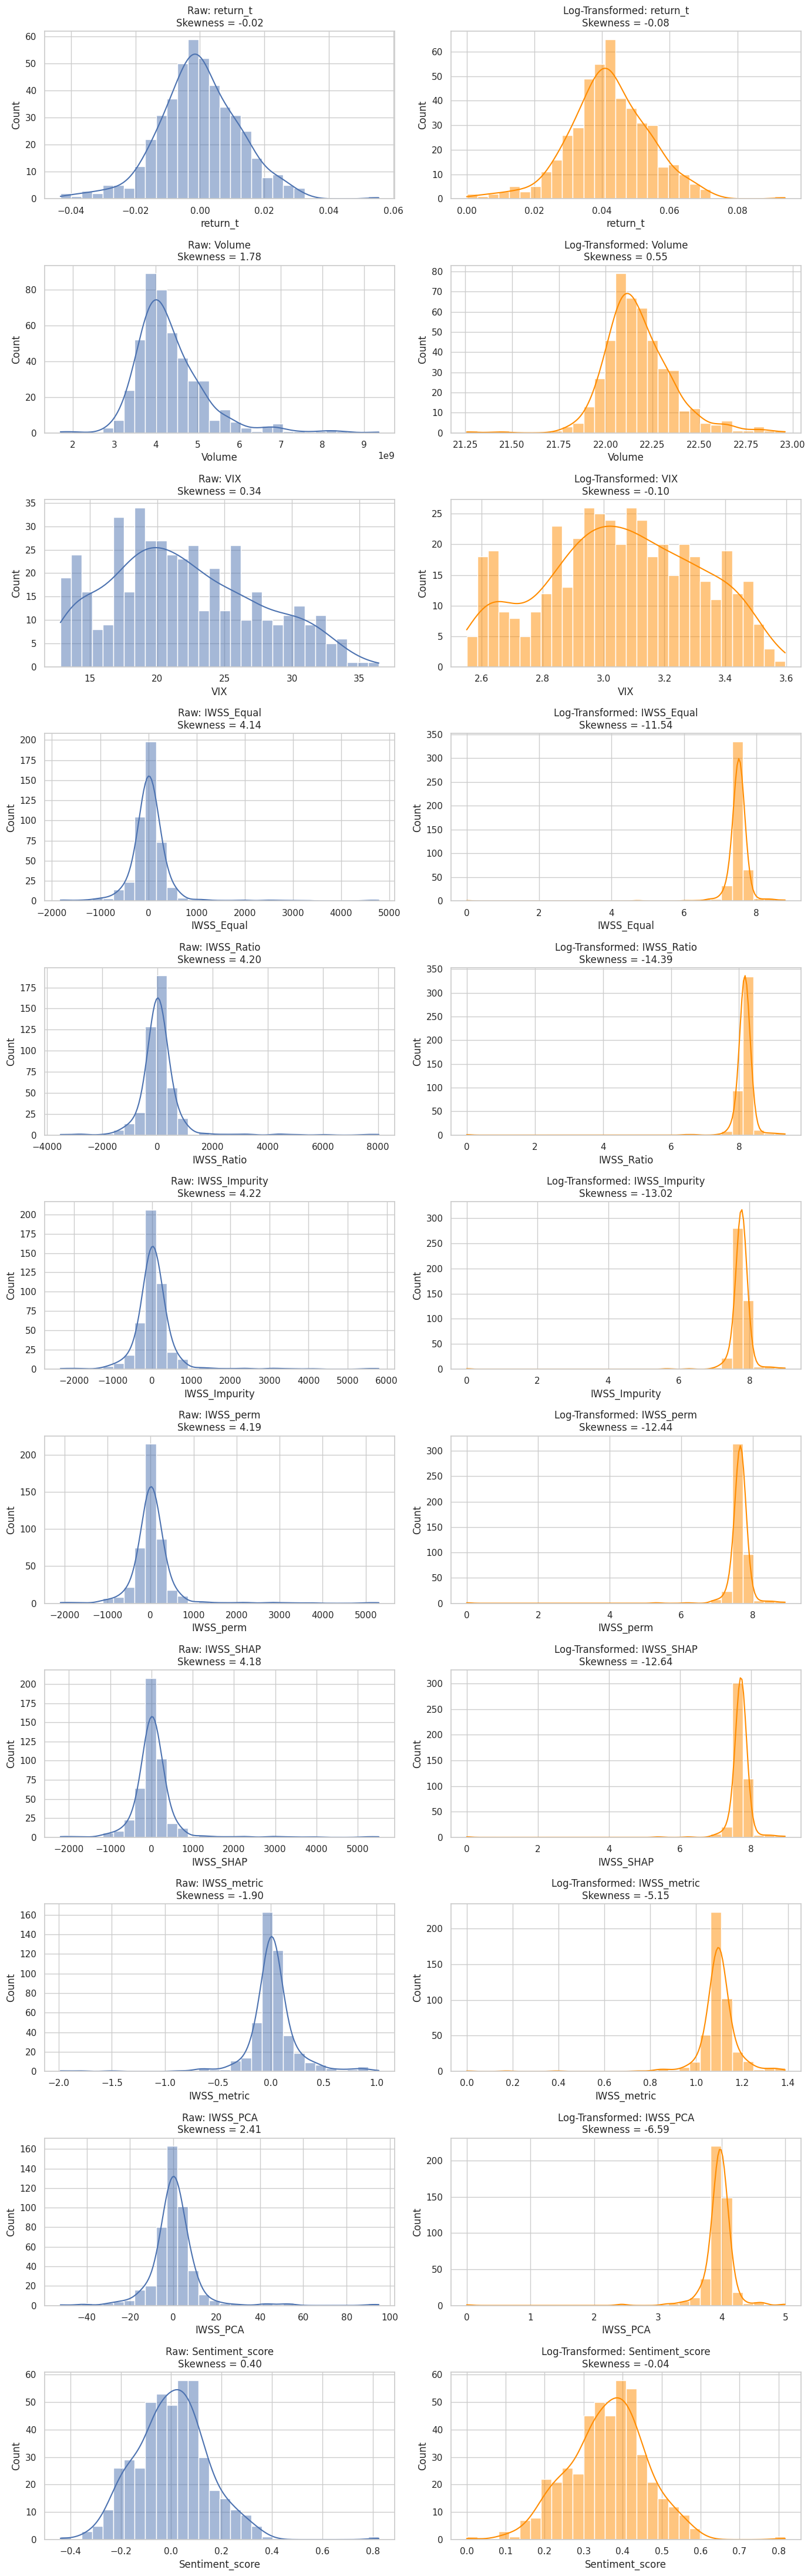

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Filter features
histplot_features = [f for f in base_features + sentiment_features if f in df_train.columns]

# Plot raw and log-transformed histograms with skewness
n_cols = 2
n_rows = len(histplot_features)
plt.figure(figsize=(14, 4 * n_rows))

for i, col in enumerate(histplot_features):
    data = df_train[col].dropna()

    # Raw skewness
    raw_skew = skew(data)

    # Raw plot
    plt.subplot(n_rows, n_cols, 2 * i + 1)
    sns.histplot(data, kde=True, bins=30)
    plt.title(f'Raw: {col}\nSkewness = {raw_skew:.2f}')

    # Safe log transformation
    if (data <= 0).any():
        log_data = np.log1p(data - data.min() + 1e-6)
    else:
        log_data = np.log(data)

    # Log skewness
    log_skew = skew(log_data)

    # Log-transformed plot
    plt.subplot(n_rows, n_cols, 2 * i + 2)
    sns.histplot(log_data, kde=True, bins=30, color='darkorange')
    plt.title(f'Log-Transformed: {col}\nSkewness = {log_skew:.2f}')

plt.tight_layout()
plt.show()



skewness did not improve with log.

In [29]:
# ---- Correlations -----
rolling_windows = [5, 10, 30]
variables_to_compare = ['return_t','Volume', 'VIX', 'Sentiment_score', 'IWSS_Equal',
                        'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA']

for col in variables_to_compare:
    if col in df_train.columns:
        plt.figure(figsize=(14, 4))
        for window in rolling_windows:
            roll_corr = df_train['return_t+1'].rolling(window=window).corr(df_train[col])
            plt.plot(df_train.index, roll_corr, label=f"{window}-day")

        plt.title(f"Rolling Correlation: Return vs {col}")
        plt.xlabel("Date")
        plt.ylabel("Correlation")
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

These rolling correlation plots between return and various features (e.g., Volume, VIX, Sentiment_score, and different IWSS variants) across 5-day, 10-day, and 30-day windows show that relationships are highly dynamic and unstable over time. Most features exhibit correlations that fluctuate around zero, frequently changing sign, especially over shorter windows. This suggests that none of these features maintain a consistently strong linear relationship with returns. For modeling return_t+1, this implies that static linear relationships may not be sufficient, and a time-aware or non-linear model (e.g., with lags, regimes, or ML methods like trees or LSTMs) might be better suited. Additionally, the observed regime shifts suggest that feature relevance may be time-varying, which justifies testing different IWSS variants individually as you are doing.

we can maybe use lags of volume, or rolling statistics

In [41]:
# Get numeric features only (excludes Date, trading_day, etc.)
features = ['IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm',
       'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA', 'Sentiment_score','Volume',
       'VIX', 'return_t+1', 'return_t','Volume_lag1', 'Volume_lag3', 'Volume_7d_mean',
       'Volume_7d_std', 'return_lag1', 'return_lag3', 'return_5d_mean',
       'return_5d_std', 'VIX_lag1', 'VIX_7d_mean', 'VIX_7d_std', 'MA_5',
       'MA_10', 'MA_ratio','sentiment_high_vol',
       'IWSS_Equal_high_vol', 'IWSS_Ratio_high_vol', 'IWSS_Impurity_high_vol',
       'IWSS_perm_high_vol', 'IWSS_SHAP_high_vol', 'IWSS_metric_high_vol',
       'IWSS_PCA_high_vol']

# Compute correlation with return_t+1
correlations = df_train_feat[features].corr()['return_t+1'].sort_values(ascending=False)

# Drop the correlation of return_t+1 with itself (1.0)
correlations = correlations.drop('return_t+1')

# Display top and bottom correlations
print("Top positively correlated features:\n")
print(correlations.head(10))

print("\nTop negatively correlated features:\n")
print(correlations.tail(10))


Top positively correlated features:

Volume_lag1       0.083172
Volume            0.061346
VIX_lag1          0.059409
VIX               0.045591
VIX_7d_mean       0.042887
Volume_7d_mean    0.041432
return_t          0.013505
Volume_lag3       0.010257
Volume_7d_std     0.007482
return_lag3      -0.008633
Name: return_t+1, dtype: float64

Top negatively correlated features:

IWSS_perm_high_vol     -0.056778
IWSS_SHAP_high_vol     -0.057375
IWSS_Equal_high_vol    -0.059902
IWSS_metric_high_vol   -0.062409
IWSS_metric            -0.068300
return_5d_std          -0.070276
Sentiment_score        -0.099658
MA_10                  -0.112923
MA_5                   -0.118433
sentiment_high_vol     -0.148869
Name: return_t+1, dtype: float64


In [94]:
features = ['IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm',
       'IWSS_SHAP', 'IWSS_metric', 'IWSS_PCA', 'Sentiment_score']

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def evaluate_linear_model(name, X_train, y_train, X_val, y_val):
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    # Metrics
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    train_mean = np.mean(y_train)
    roos = 1 - np.sum((y_val - y_pred)**2) / np.sum((y_val - train_mean)**2)
    correct = ((np.sign(y_pred) == np.sign(y_val))).sum()
    accuracy = correct / len(y_val)

    results.append({
        'Model': name,
        'Val R²': r2,
        'ROOS': roos,
        'Val MSE': mse,
        'Val MAE': mae,
        'Val RMSE': rmse,
        'Directional Accuracy (%)': accuracy * 100,
        'Correct Predictions': correct,
        'Total': len(y_val)
    })


In [110]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- Setup ---
results = []

base_features = ['return_t', 'Volume', 'VIX']

# Validation target
y_val = df_val['return_t+1']

# --- Base Model ---
evaluate_linear_model(
    'Base',
    df_train[base_features],
    df_train['return_t+1'],
    df_val[base_features],
    df_val['return_t+1']
)

# --- Sentiment Model ---
evaluate_linear_model(
    'Base + Sentiment',
    df_train[base_features + ['Sentiment_score']],
    df_train['return_t+1'],
    df_val[base_features + ['Sentiment_score']],
    df_val['return_t+1']
)

# --- IWSS Models ---
iwss_features = [f for f in features if f.startswith('IWSS_') and '_high_vol' not in f]

for iwss_feat in iwss_features:
    evaluate_linear_model(
        f'Base + {iwss_feat}',
        df_train[base_features + [iwss_feat]],
        df_train['return_t+1'],
        df_val[base_features + [iwss_feat]],
        df_val['return_t+1']
    )

# --- Show Results ---
results_df = pd.DataFrame(results).sort_values('Directional Accuracy (%)')

In [111]:
results_df

Model    Val R²      ROOS   Val MSE   Val MAE  Val RMSE  \
1      Base + Sentiment -0.272727 -0.194627  0.000062  0.006359  0.007878   
0                  Base -0.107063 -0.039129  0.000054  0.005647  0.007347   
8       Base + IWSS_PCA -0.102163 -0.034530  0.000054  0.005633  0.007331   
2     Base + IWSS_Equal -0.099956 -0.032458  0.000054  0.005623  0.007323   
4  Base + IWSS_Impurity -0.101026 -0.033462  0.000054  0.005627  0.007327   
5      Base + IWSS_perm -0.100527 -0.032994  0.000054  0.005625  0.007325   
6      Base + IWSS_SHAP -0.100278 -0.032760  0.000054  0.005625  0.007324   
3     Base + IWSS_Ratio -0.101656 -0.034053  0.000054  0.005629  0.007329   
7    Base + IWSS_metric -0.202257 -0.128481  0.000059  0.005944  0.007656   

   Directional Accuracy (%)  Correct Predictions  Total  
1                 40.816327                   60    147  
0                 41.496599                   61    147  
8                 41.496599                   61    147  
2                 42.176871                   62    147  
4                 42.176871                   62    147  
5                 42.176871                   62    147  
6                 42.176871                   62    147  
3                 42.176871                   62    147  
7                 42.176871                   62    147

In [112]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import joblib

# Initialize results list
ridge_results = []

# Define targets
y_train = df_train['return_t+1']
y_val = df_val['return_t+1']

# Alpha grid
alphas = np.logspace(-3, 2, 10)

# Track best overall model
best_model = None
best_alpha = None
best_rmse = float('inf')
best_model_name = ""
best_scaler = None

# Evaluation function
def evaluate_ridge(name, X_train, X_val):
    global best_model, best_alpha, best_rmse, best_model_name, best_scaler

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    best_local_rmse = float('inf')
    best_local_result = None

    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)

        # Predictions for training set (in-sample)
        y_train_pred = model.predict(X_train_scaled)
        r2_train = r2_score(y_train, y_train_pred)

        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        train_mean = np.mean(y_train)
        roos = 1 - np.sum((y_val - y_pred) ** 2) / np.sum((y_val - train_mean) ** 2)
        correct = ((y_pred > 0) == (y_val > 0)).sum()
        accuracy = correct / len(y_val)

        if rmse < best_local_rmse:
            best_local_result = {
                'Model': name,
                'Alpha': alpha,
                'Train R²': r2_train,
                'Val R²': r2,
                'ROOS': roos,
                'Val MSE': mse,
                'Val MAE': mae,
                'Val RMSE': rmse,
                'Directional Accuracy (%)': accuracy * 100,
                'Correct Predictions': correct,
                'Total': len(y_val)
            }
            best_local_rmse = rmse

            # Track global best model
            if rmse < best_rmse:
                best_rmse = rmse
                best_alpha = alpha
                best_model = model
                best_model_name = name
                best_scaler = scaler

    ridge_results.append(best_local_result)

# --- Evaluate Base Model ---
X_base_train = df_train[base_features]
X_base_val = df_val[base_features]
evaluate_ridge("Ridge: Base", X_base_train, X_base_val)

# --- Base + Sentiment ---
X_sent_train = df_train[base_features + ['Sentiment_score']]
X_sent_val = df_val[base_features + ['Sentiment_score']]
evaluate_ridge("Ridge: Base + Sentiment", X_sent_train, X_sent_val)

# --- Base + Each IWSS Feature ---
iwss_features = [f for f in features if f.startswith('IWSS_') and '_high_vol' not in f]
for iwss_feat in iwss_features:
    X_iwss_train = df_train[base_features + [iwss_feat]]
    X_iwss_val = df_val[base_features + [iwss_feat]]
    evaluate_ridge(f"Ridge: Base + {iwss_feat}", X_iwss_train, X_iwss_val)

# --- Save best model ---
joblib.dump(best_model, 'best_ridge_model.pkl')
joblib.dump(best_scaler, 'ridge_scaler.pkl')

# --- Show results ---
results_df = pd.DataFrame(ridge_results).sort_values('Val RMSE')

print(f"\n✅ Best Ridge Model:")
print(f"Model: {best_model_name}")
print(f"Alpha: {best_alpha:.5f}")
print(f"Validation RMSE: {best_rmse:.6f}")
print("Model saved as 'best_ridge_model.pkl'")



✅ Best Ridge Model:
Model: Ridge: Base + IWSS_Equal
Alpha: 100.00000
Validation RMSE: 0.007314
Model saved as 'best_ridge_model.pkl'


In [113]:
results_df

Model  Alpha  Train R²    Val R²      ROOS   Val MSE  \
2     Ridge: Base + IWSS_Equal  100.0  0.004668 -0.097214 -0.029884  0.000053   
6      Ridge: Base + IWSS_SHAP  100.0  0.004636 -0.097400 -0.030059  0.000054   
5      Ridge: Base + IWSS_perm  100.0  0.004616 -0.097580 -0.030227  0.000054   
4  Ridge: Base + IWSS_Impurity  100.0  0.004575 -0.097906 -0.030533  0.000054   
3     Ridge: Base + IWSS_Ratio  100.0  0.004527 -0.098297 -0.030901  0.000054   
8       Ridge: Base + IWSS_PCA  100.0  0.004527 -0.098997 -0.031558  0.000054   
0                  Ridge: Base  100.0  0.004342 -0.102129 -0.034497  0.000054   
7    Ridge: Base + IWSS_metric  100.0  0.008249 -0.174038 -0.101994  0.000057   
1      Ridge: Base + Sentiment  100.0  0.016285 -0.227245 -0.151936  0.000060   

    Val MAE  Val RMSE  Directional Accuracy (%)  Correct Predictions  Total  
2  0.005614  0.007314                 42.176871                   62    147  
6  0.005615  0.007315                 42.176871                   62    147  
5  0.005615  0.007315                 42.176871                   62    147  
4  0.005616  0.007317                 42.176871                   62    147  
3  0.005618  0.007318                 42.176871                   62    147  
8  0.005622  0.007320                 41.496599                   61    147  
0  0.005630  0.007331                 41.496599                   61    147  
7  0.005865  0.007566                 40.816327                   60    147  
1  0.006167  0.007736                 40.816327                   60    147

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import joblib

rf_results = []

y_train = df_train['return_t+1']
y_val = df_val['return_t+1']

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5]
}
grid = list(ParameterGrid(param_grid))

# Track best overall
best_model = None
best_accuracy = 0.0
best_model_name = ""
best_params = None

def evaluate_rf_grid(name, X_train, X_val):
    global best_model, best_accuracy, best_model_name, best_params

    best_local = None
    best_local_acc = 0.0

    for params in grid:
        model = RandomForestRegressor(**params, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2_val = r2_score(y_val, y_pred)
        r2_train = r2_score(y_train, y_train_pred)
        train_mean = np.mean(y_train)
        roos = 1 - np.sum((y_val - y_pred) ** 2) / np.sum((y_val - train_mean) ** 2)
        correct = ((y_pred > 0) == (y_val > 0)).sum()
        accuracy = correct / len(y_val)

        if accuracy > best_local_acc:
            best_local = {
                'Model': name,
                'Params': params,
                'Train R²': r2_train,
                'Val R²': r2_val,
                'ROOS': roos,
                'Val MSE': mse,
                'Val MAE': mae,
                'Val RMSE': rmse,
                'Directional Accuracy (%)': accuracy * 100,
                'Correct Predictions': correct,
                'Total': len(y_val)
            }
            best_local_acc = accuracy

            # Update global best
            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_model_name = name
                best_params = params

    rf_results.append(best_local)

# --- Base
evaluate_rf_grid('RF: Base', df_train[base_features], df_val[base_features])

# --- Base + Sentiment
evaluate_rf_grid('RF: Base + Sentiment',
                 df_train[base_features + ['Sentiment_score']],
                 df_val[base_features + ['Sentiment_score']])

# --- Base + IWSS
iwss_features = [f for f in features if f.startswith('IWSS_') and '_high_vol' not in f]
for iwss_feat in iwss_features:
    evaluate_rf_grid(f'RF: Base + {iwss_feat}',
                     df_train[base_features + [iwss_feat]],
                     df_val[base_features + [iwss_feat]])

# Save best model
joblib.dump(best_model, 'best_rf_model.pkl')

# Show results
rf_df = pd.DataFrame(rf_results).sort_values('Directional Accuracy (%)', ascending=False)

print(f"\n✅ Best RF Model (by Directional Accuracy):")
print(f"Model: {best_model_name}")
print(f"Params: {best_params}")
print(f"Accuracy: {best_accuracy * 100:.2f}%")



✅ Best RF Model (by Directional Accuracy):
Model: RF: Base + IWSS_perm
Params: {'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}
Accuracy: 55.78%


In [115]:
rf_df

Model  \
5      RF: Base + IWSS_perm   
8       RF: Base + IWSS_PCA   
7    RF: Base + IWSS_metric   
0                  RF: Base   
2     RF: Base + IWSS_Equal   
3     RF: Base + IWSS_Ratio   
4  RF: Base + IWSS_Impurity   
6      RF: Base + IWSS_SHAP   
1      RF: Base + Sentiment   

                                              Params  Train R²    Val R²  \
5  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.309524 -0.092403   
8  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.322643 -0.107942   
7  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.338504 -0.119391   
0  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.287093 -0.125180   
2  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.313136 -0.085250   
3  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.316851 -0.079645   
4  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.310053 -0.083383   
6  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.307926 -0.099416   
1  {'max_depth': 7, 'min_samples_leaf': 5, 'n_est...  0.351448 -0.339714   

       ROOS   Val MSE   Val MAE  Val RMSE  Directional Accuracy (%)  \
5 -0.025368  0.000053  0.005572  0.007298                 55.782313   
8 -0.039954  0.000054  0.005688  0.007350                 52.380952   
7 -0.050701  0.000055  0.005684  0.007388                 52.380952   
0 -0.056134  0.000055  0.005661  0.007407                 51.700680   
2 -0.018654  0.000053  0.005559  0.007274                 51.700680   
3 -0.013394  0.000053  0.005580  0.007255                 51.700680   
4 -0.016902  0.000053  0.005567  0.007268                 51.700680   
6 -0.031951  0.000054  0.005587  0.007322                 51.020408   
1 -0.257503  0.000065  0.006432  0.008082                 49.659864   

   Correct Predictions  Total  
5                   82    147  
8                   77    147  
7                   77    147  
0                   76    147  
2                   76    147  
3                   76    147  
4                   76    147  
6                   75    147  
1                   73    147

In [105]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import joblib

xgb_results = []

y_train = df_train['return_t+1']
y_val = df_val['return_t+1']

# Hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
grid = list(ParameterGrid(param_grid))

# Track best overall
best_model = None
best_accuracy = 0.0
best_model_name = ""
best_params = None

def evaluate_xgb_grid(name, X_train, X_val):
    global best_model, best_accuracy, best_model_name, best_params

    best_local = None
    best_local_acc = 0.0

    for params in grid:
        model = XGBRegressor(**params, objective='reg:squarederror', random_state=42, verbosity=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        correct = ((y_pred > 0) == (y_val > 0)).sum()
        accuracy = correct / len(y_val)

        if accuracy > best_local_acc:
            best_local = {
                'Model': name,
                'Params': params,
                'Val R²': r2,
                'Val MSE': mse,
                'Val MAE': mae,
                'Val RMSE': rmse,
                'Directional Accuracy (%)': accuracy * 100,
                'Correct Predictions': correct,
                'Total': len(y_val)
            }
            best_local_acc = accuracy

            # Update global best
            if accuracy > best_accuracy:
                best_model = model
                best_accuracy = accuracy
                best_model_name = name
                best_params = params

    xgb_results.append(best_local)

# --- Base
evaluate_xgb_grid('XGB: Base', df_train[base_features], df_val[base_features])

# --- Base + Sentiment
evaluate_xgb_grid('XGB: Base + Sentiment',
                  df_train[base_features + ['Sentiment_score']],
                  df_val[base_features + ['Sentiment_score']])

# --- Base + IWSS
iwss_features = [f for f in features if f.startswith('IWSS_') and '_high_vol' not in f]
for iwss_feat in iwss_features:
    evaluate_xgb_grid(f'XGB: Base + {iwss_feat}',
                      df_train[base_features + [iwss_feat]],
                      df_val[base_features + [iwss_feat]])

# Save best model
joblib.dump(best_model, 'best_xgb_model.pkl')

# Show results
xgb_df = pd.DataFrame(xgb_results).sort_values('Directional Accuracy (%)', ascending=False)

print(f"\n✅ Best XGBoost Model (by Directional Accuracy):")
print(f"Model: {best_model_name}")
print(f"Params: {best_params}")
print(f"Accuracy: {best_accuracy * 100:.2f}%")



✅ Best XGBoost Model (by Directional Accuracy):
Model: XGB: Base + IWSS_SHAP
Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 57.82%


In [106]:
xgb_df

Model  \
6      XGB: Base + IWSS_SHAP   
0                  XGB: Base   
4  XGB: Base + IWSS_Impurity   
3     XGB: Base + IWSS_Ratio   
2     XGB: Base + IWSS_Equal   
7    XGB: Base + IWSS_metric   
5      XGB: Base + IWSS_perm   
8       XGB: Base + IWSS_PCA   
1      XGB: Base + Sentiment   

                                              Params    Val R²   Val MSE  \
6  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti... -0.255520  0.000061   
0  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti... -0.233348  0.000060   
4  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti... -0.142927  0.000056   
3  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti... -0.799382  0.000088   
2  {'learning_rate': 0.01, 'max_depth': 5, 'n_est... -0.082213  0.000053   
7  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti... -0.483372  0.000072   
5  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti... -0.140810  0.000056   
8  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti... -0.169628  0.000057   
1  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti... -0.609871  0.000078   

    Val MAE  Val RMSE  Directional Accuracy (%)  Correct Predictions  Total  
6  0.006013  0.007824                 57.823129                   85    147  
0  0.006009  0.007755                 56.462585                   83    147  
4  0.005738  0.007465                 55.782313                   82    147  
3  0.007762  0.009367                 54.421769                   80    147  
2  0.005539  0.007264                 53.741497                   79    147  
7  0.006824  0.008504                 53.741497                   79    147  
5  0.005694  0.007458                 52.380952                   77    147  
8  0.005877  0.007552                 51.700680                   76    147  
1  0.006945  0.008860                 51.020408                   75    147